# EDA(Exploratory data Analysis)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from scipy.stats import t,f,normaltest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FloodProbability/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/FloodProbability/test.csv')


In [ ]:
df.head(10)

id  MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0   0                 5                   8                5              8   
1   1                 6                   7                4              4   
2   2                 6                   5                6              7   
3   3                 3                   4                6              5   
4   4                 5                   3                2              6   
5   5                 5                   4                1              4   
6   6                 8                   3                1              2   
7   7                 6                   6                5              7   
8   8                 5                   2                8              5   
9   9                 4                   2                3              5   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             6              4            4          3                      3   
1             8              8            3          5                      4   
2             3              7            1          5                      4   
3             4              8            4          7                      6   
4             4              4            3          3                      3   
5             2              4            6          6                      7   
6             3              7            3          4                      6   
7             5              5            3          5                      5   
8             4              5            2          4                      5   
9             8              6            5          5                      7   

   ...  DrainageSystems  CoastalVulnerability  Landslides  Watersheds  \
0  ...                5                     3           3           5   
1  ...                7                     2           0           3   
2  ...                7                     3           7           5   
3  ...                2                     4           7           4   
4  ...                2                     2           6           6   
5  ...                3                     5           5           4   
6  ...                2                     5           6           4   
7  ...                5                     3           5           5   
8  ...                9                     2           7           3   
9  ...                6                     3           3           4   

   DeterioratingInfrastructure  PopulationScore  WetlandLoss  \
0                            4                7            5   
1                            5                3            3   
2                            6                8            2   
3                            4                6            5   
4                            4                1            2   
5                            4                6            8   
6                            5                6            3   
7                            8                6            8   
8                            4                6            4   
9                            4                3            3   

   InadequatePlanning  PoliticalFactors  FloodProbability  
0                   7                 3             0.445  
1                   4                 3             0.450  
2                   3                 3             0.530  
3                   7                 5             0.535  
4                   3                 5             0.415  
5                   3                 2             0.440  
6                   4                 6             0.460  
7                   5                 6             0.595  
8                   5                 5             0.505  
9                   5                 6             0.455  

[10 rows x 22 columns]

In [ ]:
df.shape

(1117957, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [ ]:
df.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [ ]:
df.describe().T

count           mean            std  \
id                               1117957.0  558978.000000  322726.531784   
MonsoonIntensity                 1117957.0       4.921450       2.056387   
TopographyDrainage               1117957.0       4.926671       2.093879   
RiverManagement                  1117957.0       4.955322       2.072186   
Deforestation                    1117957.0       4.942240       2.051689   
Urbanization                     1117957.0       4.942517       2.083391   
ClimateChange                    1117957.0       4.934093       2.057742   
DamsQuality                      1117957.0       4.955878       2.083063   
Siltation                        1117957.0       4.927791       2.065992   
AgriculturalPractices            1117957.0       4.942619       2.068545   
Encroachments                    1117957.0       4.949230       2.083324   
IneffectiveDisasterPreparedness  1117957.0       4.945239       2.078141   
DrainageSystems                  1117957.0       4.946893       2.072333   
CoastalVulnerability             1117957.0       4.953999       2.088899   
Landslides                       1117957.0       4.931376       2.078287   
Watersheds                       1117957.0       4.929032       2.082395   
DeterioratingInfrastructure      1117957.0       4.925907       2.064813   
PopulationScore                  1117957.0       4.927520       2.074176   
WetlandLoss                      1117957.0       4.950859       2.068696   
InadequatePlanning               1117957.0       4.940587       2.081123   
PoliticalFactors                 1117957.0       4.939004       2.090350   
FloodProbability                 1117957.0       0.504480       0.051026   

                                   min        25%         50%        75%  \
id                               0.000  279489.00  558978.000  838467.00   
MonsoonIntensity                 0.000       3.00       5.000       6.00   
TopographyDrainage               0.000       3.00       5.000       6.00   
RiverManagement                  0.000       4.00       5.000       6.00   
Deforestation                    0.000       4.00       5.000       6.00   
Urbanization                     0.000       3.00       5.000       6.00   
ClimateChange                    0.000       3.00       5.000       6.00   
DamsQuality                      0.000       4.00       5.000       6.00   
Siltation                        0.000       3.00       5.000       6.00   
AgriculturalPractices            0.000       3.00       5.000       6.00   
Encroachments                    0.000       4.00       5.000       6.00   
IneffectiveDisasterPreparedness  0.000       3.00       5.000       6.00   
DrainageSystems                  0.000       4.00       5.000       6.00   
CoastalVulnerability             0.000       3.00       5.000       6.00   
Landslides                       0.000       3.00       5.000       6.00   
Watersheds                       0.000       3.00       5.000       6.00   
DeterioratingInfrastructure      0.000       3.00       5.000       6.00   
PopulationScore                  0.000       3.00       5.000       6.00   
WetlandLoss                      0.000       4.00       5.000       6.00   
InadequatePlanning               0.000       3.00       5.000       6.00   
PoliticalFactors                 0.000       3.00       5.000       6.00   
FloodProbability                 0.285       0.47       0.505       0.54   

                                         max  
id                               1117956.000  
MonsoonIntensity                      16.000  
TopographyDrainage                    18.000  
RiverManagement                       16.000  
Deforestation                         17.000  
Urbanization                          17.000  
ClimateChange                         17.000  
DamsQuality                           16.000  
Siltation                             16.000  
AgriculturalPractices                 16.000  
Encroachments         

In [ ]:
df[df['WetlandLoss'] > 10 ]

id  MonsoonIntensity  TopographyDrainage  RiverManagement  \
215          215                 5                   8                6   
294          294                 4                   3                4   
332          332                 5                   4                7   
343          343                 4                   2                2   
509          509                 3                   6                6   
...          ...               ...                 ...              ...   
1117188  1117188                 5                   4                5   
1117391  1117391                 6                   4                7   
1117528  1117528                 3                   4                5   
1117780  1117780                 6                   5                5   
1117822  1117822                11                   6                4   

         Deforestation  Urbanization  ClimateChange  DamsQuality  Siltation  \
215                  7            10              3            2          3   
294                  6             5              8            2          8   
332                  4             3              4            6          5   
343                  6             8              6            5          2   
509                  3             3              3            2          9   
...                ...           ...            ...          ...        ...   
1117188              3             5              6            5          6   
1117391              5             4              3            6          5   
1117528              5             8              5            4          3   
1117780              7             5              3            5          4   
1117822              8             3              3            4          5   

         AgriculturalPractices  ...  DrainageSystems  CoastalVulnerability  \
215                          5  ...                4                     3   
294                          6  ...                5                     4   
332                          4  ...                5                     3   
343                          6  ...                2                     4   
509                          4  ...                5                     7   
...                        ...  ...              ...                   ...   
1117188                      1  ...                4                     9   
1117391                      8  ...                3                    10   
1117528                      6  ...                5                     6   
1117780                      7  ...                3                     4   
1117822                      5  ...                3                     2   

         Landslides  Watersheds  DeterioratingInfrastructure  PopulationScore  \
215               5           8                            2                6   
294               6           4                           10                8   
332               2           4                            9                3   
343               9           3                            7                6   
509               3           7                            2                9   
...             ...         ...                          ...              ...   
1117188           5           3                            6                6   
1117391           5           5                            6                4   
1117528           4           7                            4                7   
1117780           3           5                            4                2   
1117822           5           4                            8                7   

         WetlandLoss  InadequatePlanning  PoliticalFactors  FloodProbability  
215               13                   9                 3             0.575  
294               11                   6                 5             0.585  
332              

In [ ]:
for i in df.columns:
  print(f'{i} value counts:')
  print(df[i].value_counts().sort_index())


id value counts:
id
0          1
1          1
2          1
3          1
4          1
          ..
1117952    1
1117953    1
1117954    1
1117955    1
1117956    1
Name: count, Length: 1117957, dtype: int64
MonsoonIntensity value counts:
MonsoonIntensity
0       5431
1      28946
2      86683
3     160574
4     214344
5     220936
6     169080
7     109210
8      65954
9      33515
10     14040
11      5851
12      2062
13       729
14       391
15       169
16        42
Name: count, dtype: int64
TopographyDrainage value counts:
TopographyDrainage
0       5541
1      29422
2      90058
3     161989
4     213368
5     221252
6     159003
7     102681
8      72000
9      37544
10     15524
11      6177
12      2199
13       705
14       333
15       106
16        42
17        10
18         3
Name: count, dtype: int64
RiverManagement value counts:
RiverManagement
0       5407
1      28872
2      83782
3     160049
4     214079
5     218216
6     167368
7     108538
8      71204
9      3623

In [ ]:
print(df['WetlandLoss'].value_counts())


WetlandLoss
4     217045
5     214587
6     167265
3     161270
7     109524
2      84515
8      71347
9      34947
1      27958
10     15041
11      5993
0       5192
12      2141
13       689
14       299
15       102
16        37
17         3
18         1
19         1
Name: count, dtype: int64


In [ ]:
# Filter the DataFrame to include only values between 0 and 15 in each column
filtered_df = df[(df >= 0) & (df <= 15)]

# Print the filtered DataFrame
filtered_df

id  MonsoonIntensity  TopographyDrainage  RiverManagement  \
0        0.0               5.0                 8.0              5.0   
1        1.0               6.0                 7.0              4.0   
2        2.0               6.0                 5.0              6.0   
3        3.0               3.0                 4.0              6.0   
4        4.0               5.0                 3.0              2.0   
...      ...               ...                 ...              ...   
1117952  NaN               3.0                 3.0              4.0   
1117953  NaN               2.0                 2.0              4.0   
1117954  NaN               7.0                 3.0              9.0   
1117955  NaN               7.0                 3.0              3.0   
1117956  NaN               4.0                 5.0              6.0   

         Deforestation  Urbanization  ClimateChange  DamsQuality  Siltation  \
0                  8.0           6.0            4.0          4.0        3.0   
1                  4.0           8.0            8.0          3.0        5.0   
2                  7.0           3.0            7.0          1.0        5.0   
3                  5.0           4.0            8.0          4.0        7.0   
4                  6.0           4.0            4.0          3.0        3.0   
...                ...           ...            ...          ...        ...   
1117952           10.0           4.0            5.0          5.0        7.0   
1117953            3.0           9.0            5.0          8.0        1.0   
1117954            4.0           6.0            5.0          9.0        1.0   
1117955            7.0           5.0            2.0          3.0        4.0   
1117956            9.0           5.0            5.0          2.0        8.0   

         AgriculturalPractices  ...  DrainageSystems  CoastalVulnerability  \
0                          3.0  ...              5.0                   3.0   
1                          4.0  ...              7.0                   2.0   
2                          4.0  ...              7.0                   3.0   
3                          6.0  ...              2.0                   4.0   
4                          3.0  ...              2.0                   2.0   
...                        ...  ...              ...                   ...   
1117952                   10.0  ...              7.0                   8.0   
1117953                    3.0  ...              9.0                   4.0   
1117954                    3.0  ...              5.0                   5.0   
1117955                    6.0  ...              6.0                   8.0   
1117956                    4.0  ...              4.0                   8.0   

         Landslides  Watersheds  DeterioratingInfrastructure  PopulationScore  \
0               3.0         5.0                          4.0              7.0   
1               0.0         3.0                          5.0              3.0   
2               7.0         5.0                          6.0              8.0   
3               7.0         4.0                          4.0              6.0   
4               6.0         6.0                          4.0              1.0   
...             ...         ...                          ...              ...   
1117952         7.0         2.0                          2.0              1.0   
1117953         4.0         3.0                          7.0              4.0   
1117954         5.0         5.0                          6.0              5.0   
1117955         5.0         3.0                          4.0              6.0   
1117956         6.0         5.0                          5.0              6.0   

         WetlandLoss  InadequatePlanning  PoliticalFactors  FloodProbability  
0                5.0                 7.0               3.0             0.445  
1                3.0                 4.0               3.0             0.450  
2                2.0                 3.0               3.0   

In [ ]:
df_test.describe().T

count          mean            std  \
id                               745305.0  1.490609e+06  215151.165527   
MonsoonIntensity                 745305.0  4.915610e+00       2.056295   
TopographyDrainage               745305.0  4.930288e+00       2.094117   
RiverManagement                  745305.0  4.960027e+00       2.071722   
Deforestation                    745305.0  4.946084e+00       2.052602   
Urbanization                     745305.0  4.938424e+00       2.081816   
ClimateChange                    745305.0  4.933524e+00       2.059243   
DamsQuality                      745305.0  4.958468e+00       2.089312   
Siltation                        745305.0  4.927651e+00       2.068110   
AgriculturalPractices            745305.0  4.945308e+00       2.073404   
Encroachments                    745305.0  4.950620e+00       2.081750   
IneffectiveDisasterPreparedness  745305.0  4.947436e+00       2.081322   
DrainageSystems                  745305.0  4.944003e+00       2.072335   
CoastalVulnerability             745305.0  4.957209e+00       2.088787   
Landslides                       745305.0  4.927620e+00       2.079006   
Watersheds                       745305.0  4.930720e+00       2.083348   
DeterioratingInfrastructure      745305.0  4.926062e+00       2.065638   
PopulationScore                  745305.0  4.926957e+00       2.073692   
WetlandLoss                      745305.0  4.948424e+00       2.065891   
InadequatePlanning               745305.0  4.940204e+00       2.079128   
PoliticalFactors                 745305.0  4.943918e+00       2.087387   

                                       min        25%        50%        75%  \
id                               1117957.0  1304283.0  1490609.0  1676935.0   
MonsoonIntensity                       0.0        3.0        5.0        6.0   
TopographyDrainage                     0.0        3.0        5.0        6.0   
RiverManagement                        0.0        4.0        5.0        6.0   
Deforestation                          0.0        4.0        5.0        6.0   
Urbanization                           0.0        3.0        5.0        6.0   
ClimateChange                          0.0        3.0        5.0        6.0   
DamsQuality                            0.0        4.0        5.0        6.0   
Siltation                              0.0        3.0        5.0        6.0   
AgriculturalPractices                  0.0        3.0        5.0        6.0   
Encroachments                          0.0        4.0        5.0        6.0   
IneffectiveDisasterPreparedness        0.0        3.0        5.0        6.0   
DrainageSystems                        0.0        4.0        5.0        6.0   
CoastalVulnerability                   0.0        3.0        5.0        6.0   
Landslides                             0.0        3.0        5.0        6.0   
Watersheds                             0.0        3.0        5.0        6.0   
DeterioratingInfrastructure            0.0        3.0        5.0        6.0   
PopulationScore                        0.0        3.0        5.0        6.0   
WetlandLoss                            0.0        4.0        5.0        6.0   
InadequatePlanning                     0.0        3.0        5.0        6.0   
PoliticalFactors                       0.0        3.0        5.0        6.0   

                                       max  
id                               1863261.0  
MonsoonIntensity                      16.0  
TopographyDrainage                    17.0  
RiverManagement                       16.0  
Deforestation                         17.0  
Urbanization                          17.0  
ClimateChange                         17.0  
DamsQuality                           16.0  
Siltation                             16.0  
AgriculturalPractices                 16.0  
Encroachments                         17.0  
IneffectiveDisasterPreparedness       16.0  
DrainageSystems                       17.0  
CoastalVulnerability                  

In [ ]:
df_test[df_test['WetlandLoss'] == 22]

id  MonsoonIntensity  TopographyDrainage  RiverManagement  \
530164  1648121                 3                   6                4   

        Deforestation  Urbanization  ClimateChange  DamsQuality  Siltation  \
530164              7             8              7            5          8   

        AgriculturalPractices  ...  IneffectiveDisasterPreparedness  \
530164                      5  ...                                2   

        DrainageSystems  CoastalVulnerability  Landslides  Watersheds  \
530164                2                     6           3           4   

        DeterioratingInfrastructure  PopulationScore  WetlandLoss  \
530164                            3                6           22   

        InadequatePlanning  PoliticalFactors  
530164                   3                 7  

[1 rows x 21 columns]

In [ ]:
df['MonsoonIntensity'].describe()

count    1.117957e+06
mean     4.921450e+00
std      2.056387e+00
min      0.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      6.000000e+00
max      1.600000e+01
Name: MonsoonIntensity, dtype: float64

Scatterplot of each independent variable with the floodProbability

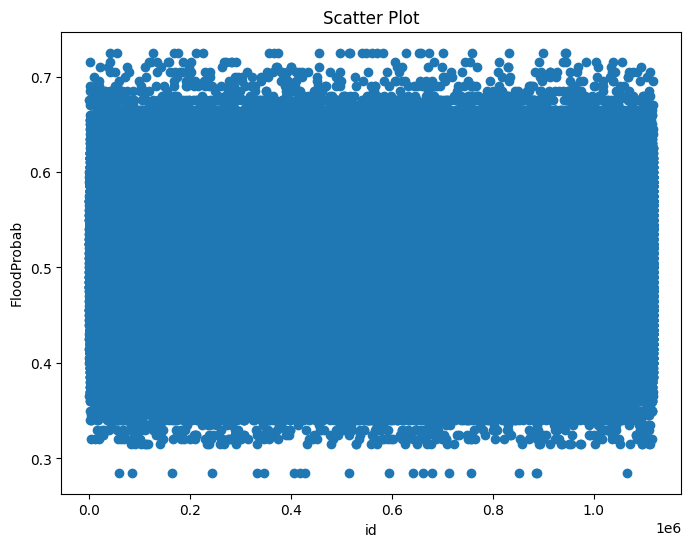

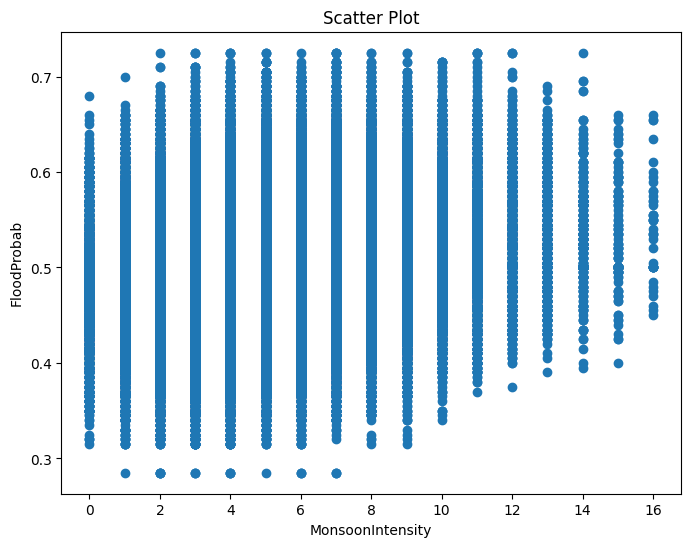

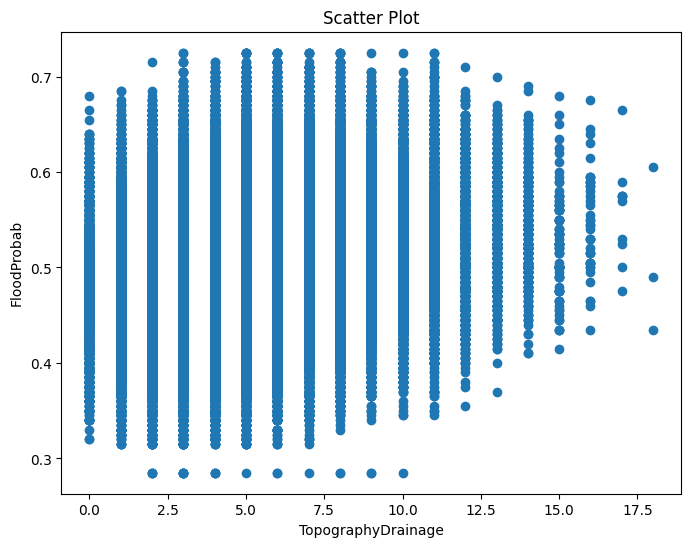

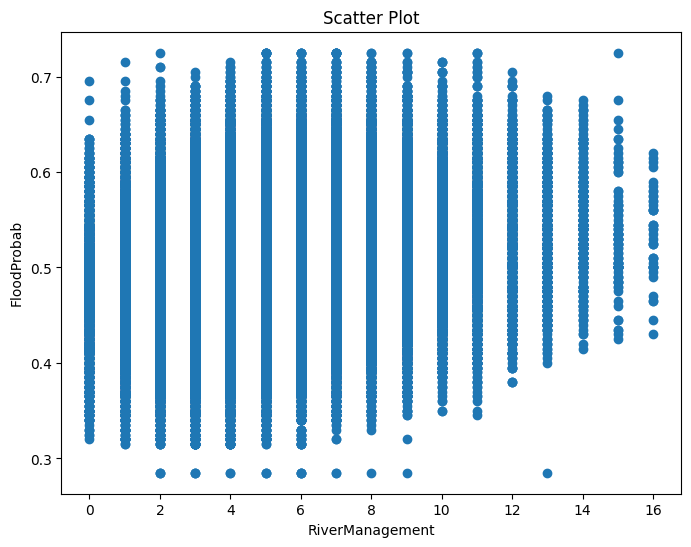

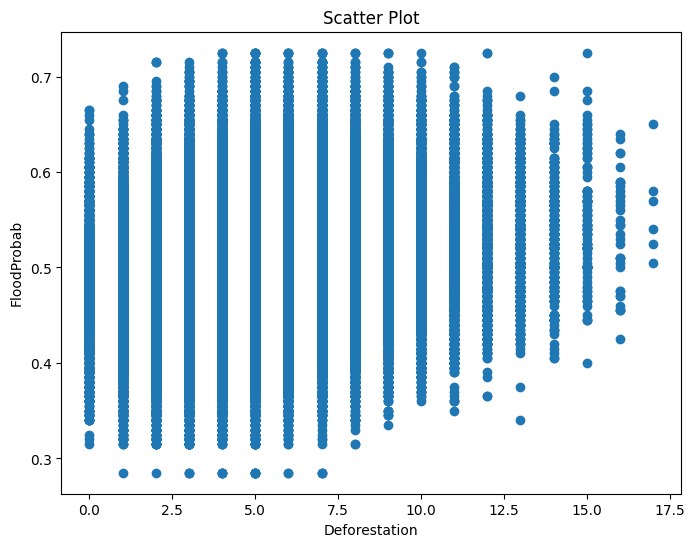

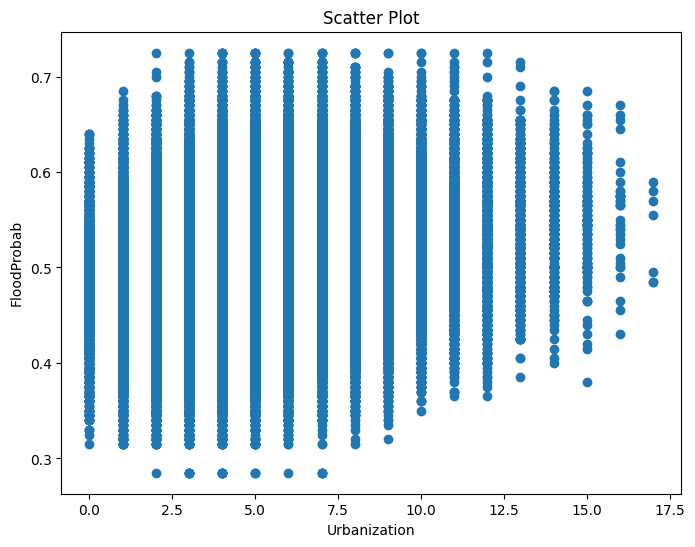

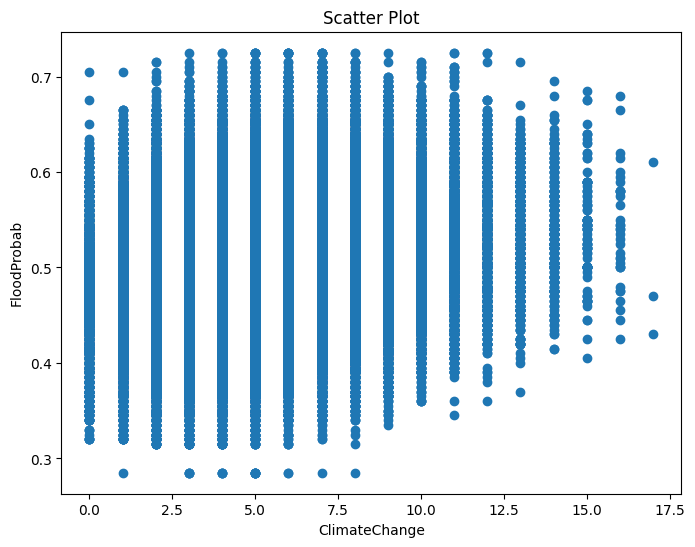

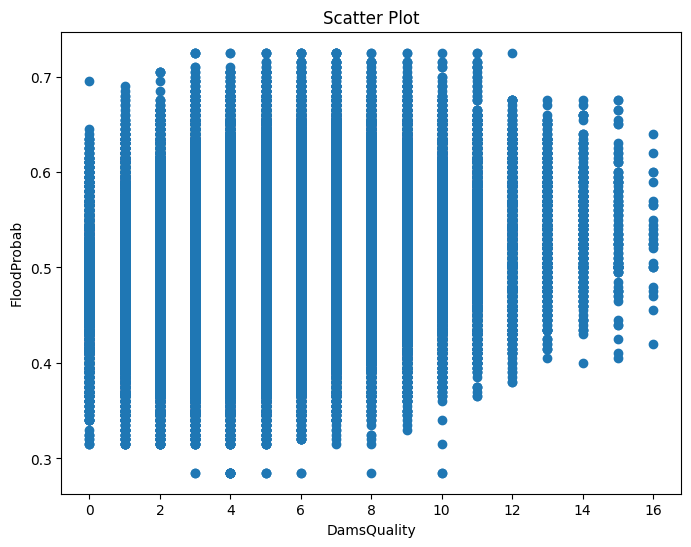

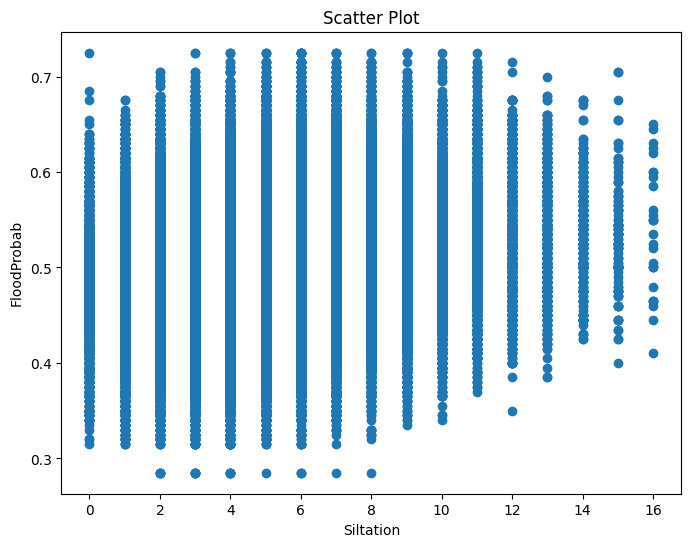

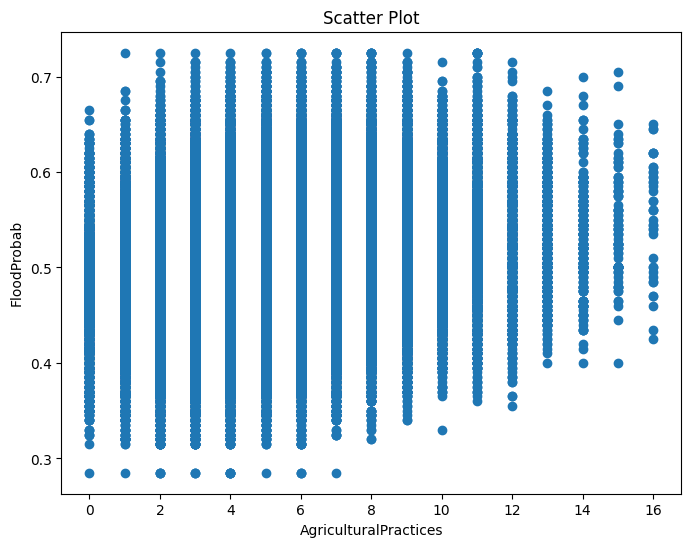

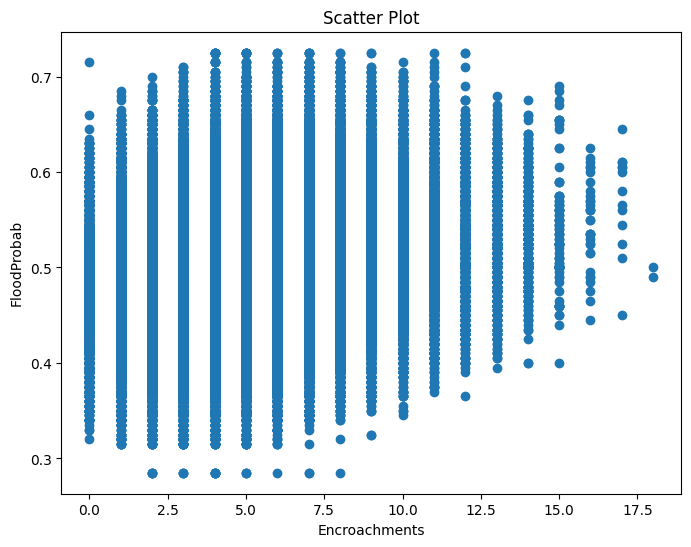

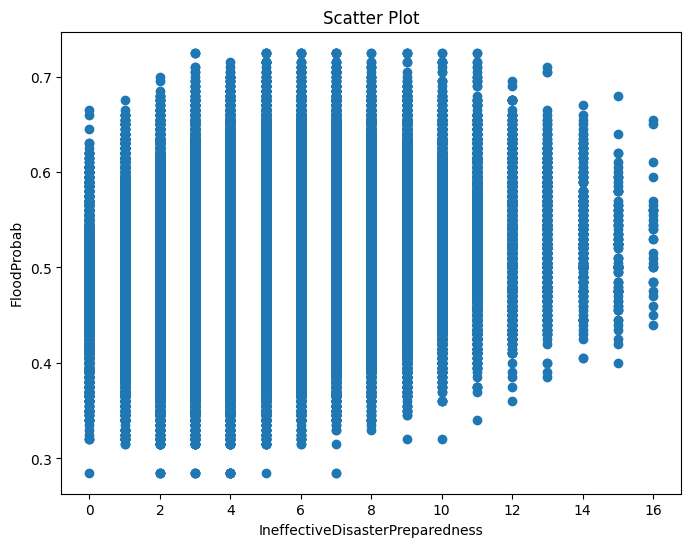

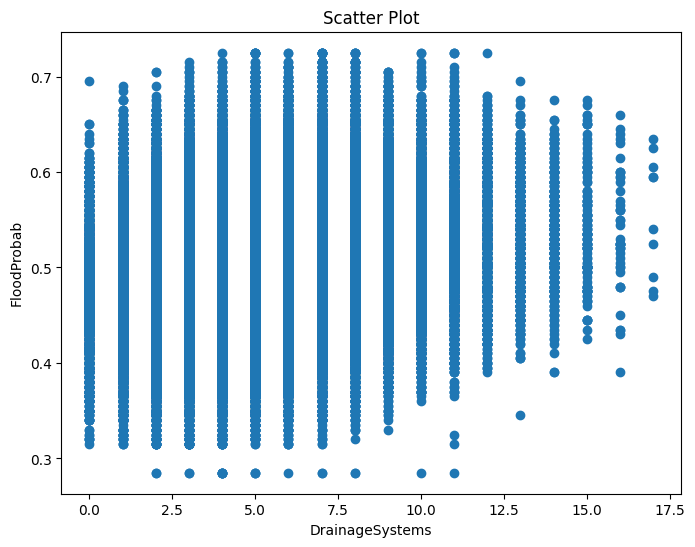

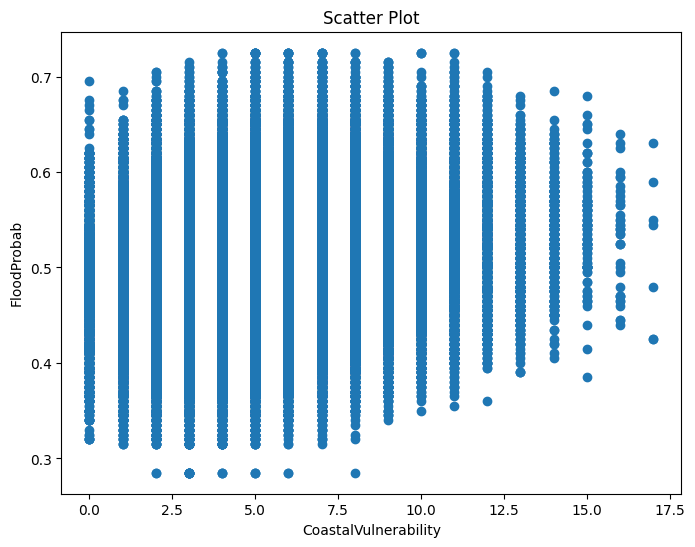

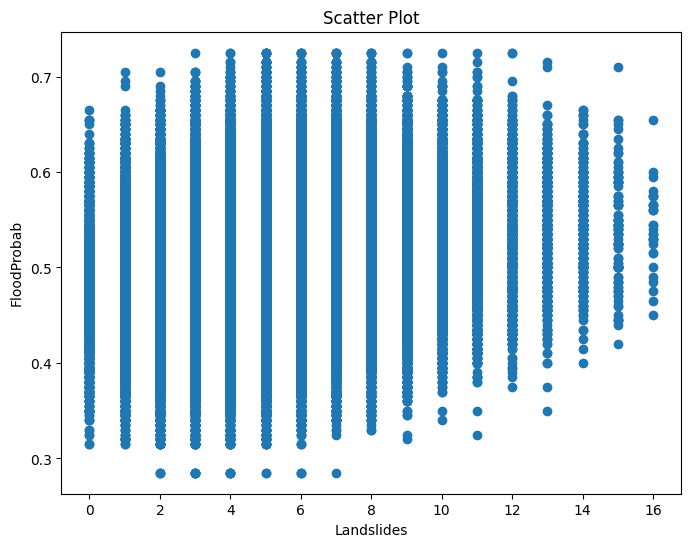

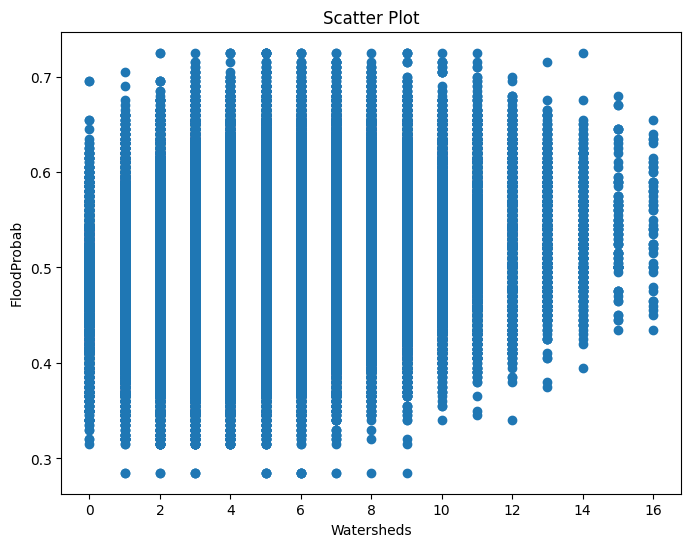

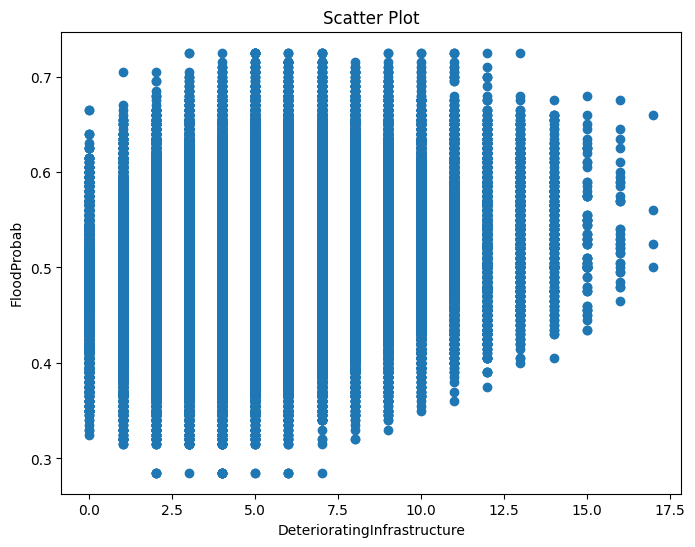

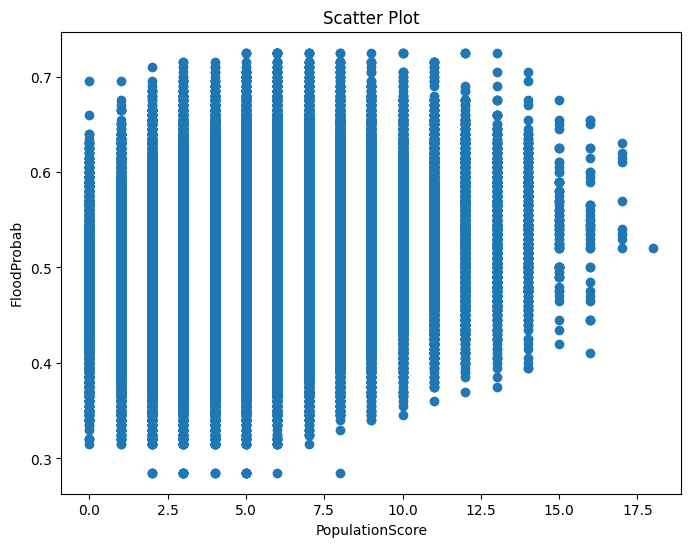

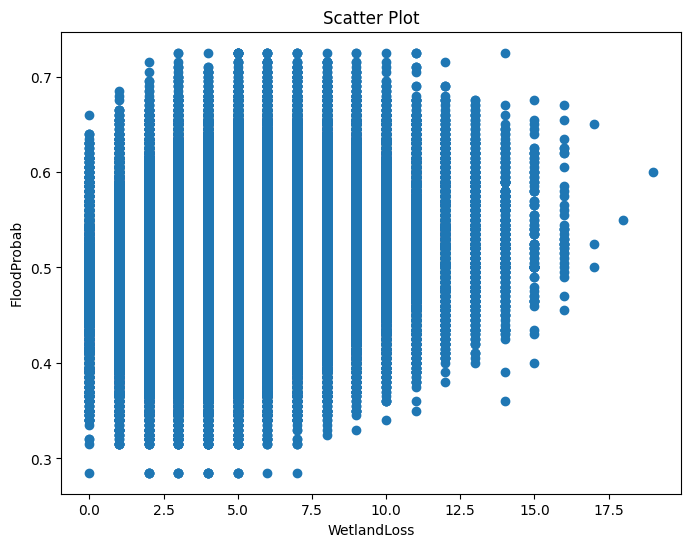

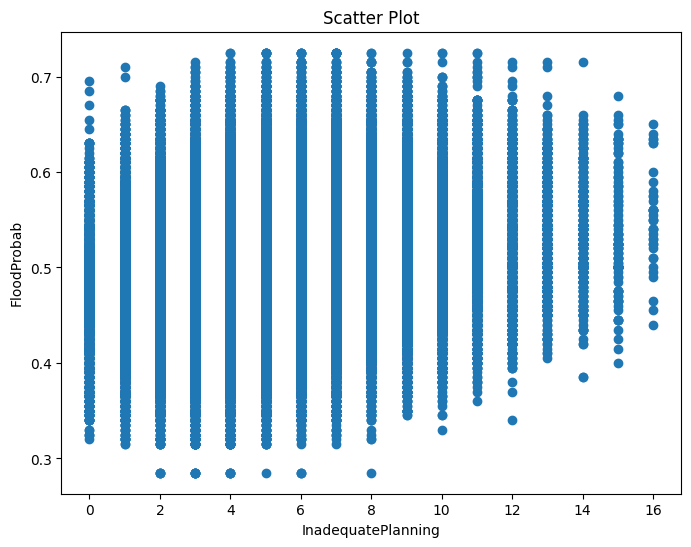

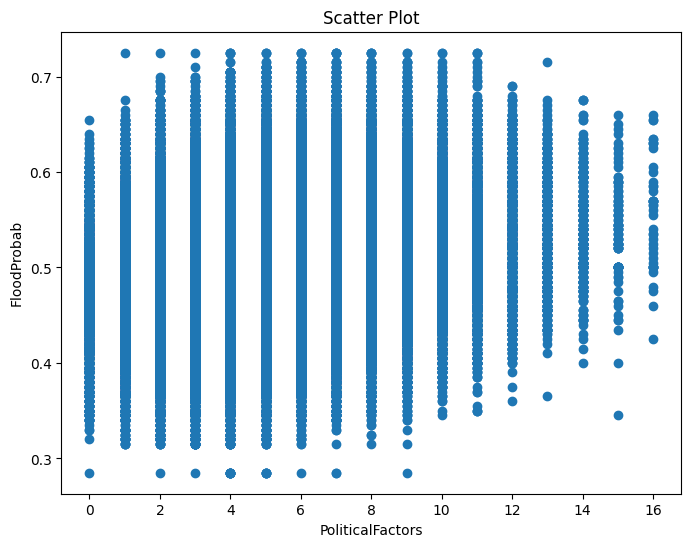

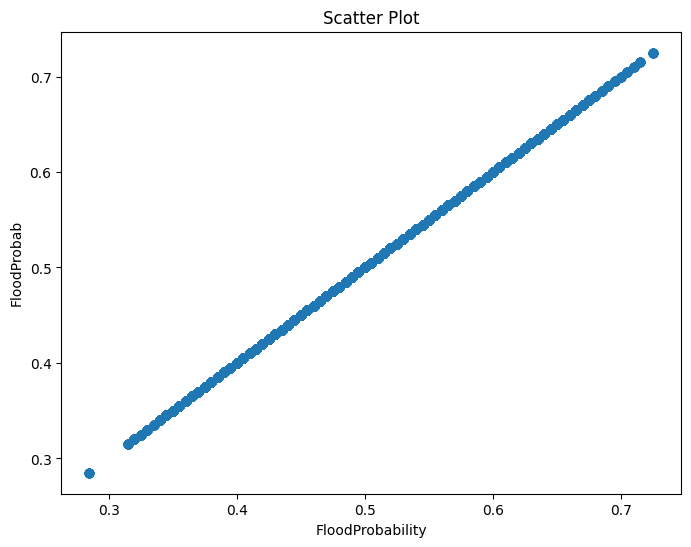

In [ ]:
# Scatter plot
for i in df.columns:
  plt.figure(figsize=(8, 6))
  plt.scatter(df[i], df['FloodProbability'])
  plt.title('Scatter Plot')
  plt.xlabel(f'{i}')
  plt.ylabel('FloodProbab')
  plt.show()

In [ ]:
target_variable = 'FloodProbability'

# Create a list of all features excluding the target variable
features = [col for col in df.columns if col != target_variable]

# Plot box plots for each feature
for feature in features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y=target_variable, data=df)
    plt.title(f'Flood Probability vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Flood Probability')
    plt.xticks(rotation=45)  # Rotate x-axis labels if they are categorical and long
    plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7f1fb5e35000> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f1fb5e34280> (for post_execute):


KeyboardInterrupt: 

Dropping ID

In [ ]:
df = df.drop(columns=['id'])

Data Normal?

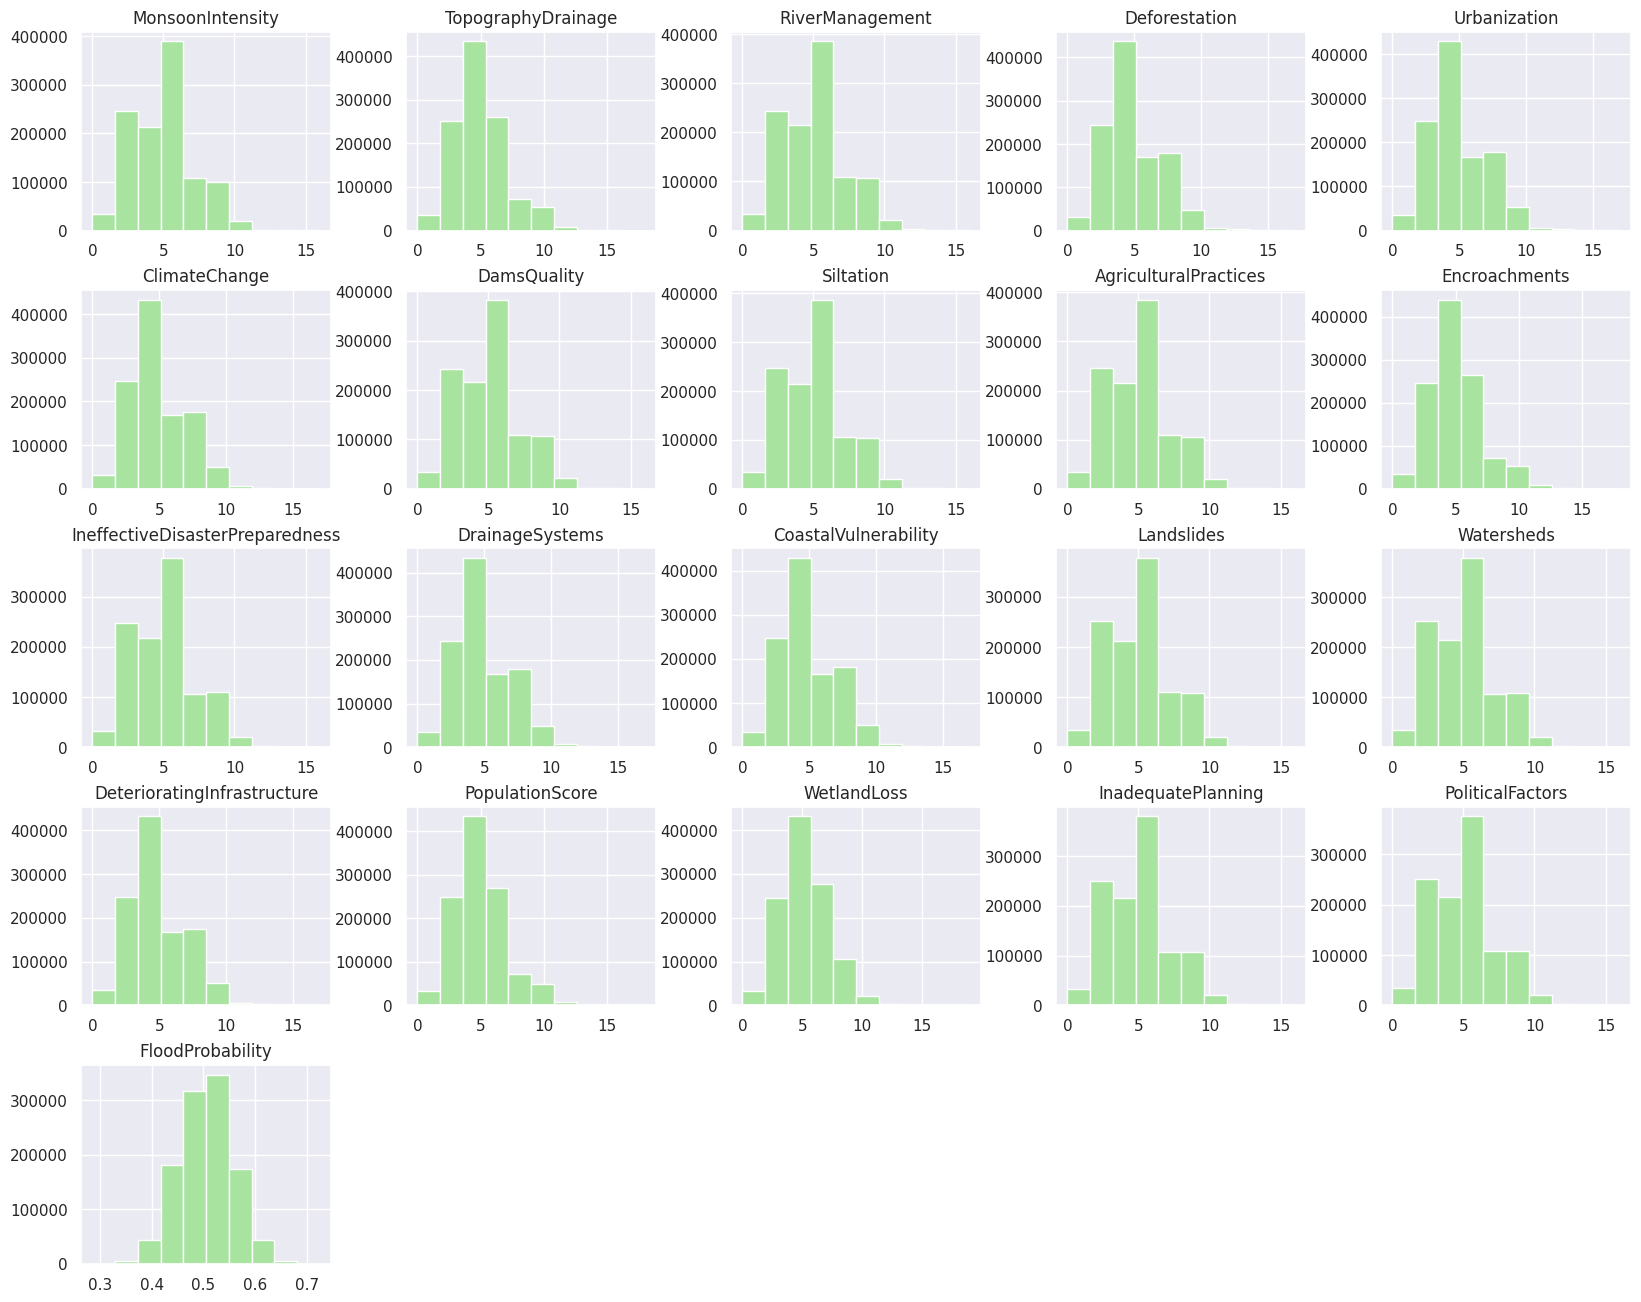

In [ ]:
sns.set(rc={'figure.figsize': (20, 16)})
df.hist(color='#A8E4A0');

In [ ]:
# Create KDE plot using Plotly Express
fig = px.histogram(df['FloodProbability'], title="Kernel Density Estimation Plot", histnorm='probability density')
fig.show()

Correlation with FloodProbability

In [ ]:
df.corr()

MonsoonIntensity  TopographyDrainage  \
MonsoonIntensity                         1.000000           -0.007362   
TopographyDrainage                      -0.007362            1.000000   
RiverManagement                         -0.008070           -0.009924   
Deforestation                           -0.007251           -0.008548   
Urbanization                            -0.009309           -0.010532   
ClimateChange                           -0.008031           -0.009619   
DamsQuality                             -0.007787           -0.007607   
Siltation                               -0.007836           -0.009824   
AgriculturalPractices                   -0.008232           -0.009496   
Encroachments                           -0.010309           -0.012887   
IneffectiveDisasterPreparedness         -0.008032           -0.010746   
DrainageSystems                         -0.009716           -0.010056   
CoastalVulnerability                    -0.010659           -0.012526   
Landslides                              -0.009121           -0.010240   
Watersheds                              -0.008900           -0.011067   
DeterioratingInfrastructure             -0.008486           -0.006628   
PopulationScore                         -0.008679           -0.010815   
WetlandLoss                             -0.006811           -0.010267   
InadequatePlanning                      -0.008155           -0.011617   
PoliticalFactors                        -0.008474           -0.012350   
FloodProbability                         0.189098            0.187635   

                                 RiverManagement  Deforestation  Urbanization  \
MonsoonIntensity                       -0.008070      -0.007251     -0.009309   
TopographyDrainage                     -0.009924      -0.008548     -0.010532   
RiverManagement                         1.000000      -0.008574     -0.012292   
Deforestation                          -0.008574       1.000000     -0.012248   
Urbanization                           -0.012292      -0.012248      1.000000   
ClimateChange                          -0.009237      -0.008266     -0.011199   
DamsQuality                            -0.008711      -0.009356     -0.011128   
Siltation                              -0.010058      -0.011536     -0.010153   
AgriculturalPractices                  -0.010783      -0.010039     -0.010559   
Encroachments                          -0.011615      -0.013175     -0.010784   
IneffectiveDisasterPreparedness        -0.010675      -0.009512     -0.012685   
DrainageSystems                        -0.011277      -0.010490     -0.012572   
CoastalVulnerability                   -0.011680      -0.012388     -0.014497   
Landslides                             -0.008994      -0.009257     -0.010582   
Watersheds                             -0.011412      -0.010671     -0.012107   
DeterioratingInfrastructure            -0.005827      -0.008862     -0.010656   
PopulationScore                        -0.006727      -0.011777     -0.011485   
WetlandLoss                            -0.010069      -0.011004     -0.011023   
InadequatePlanning                     -0.009673      -0.010424     -0.011584   
PoliticalFactors                       -0.011550      -0.009661     -0.013005   
FloodProbability                        0.187131       0.184001      0.180861   

                                 ClimateChange  DamsQuality  Siltation  \
MonsoonIntensity                     -0.008031    -0.007787  -0.007836   
TopographyDrainage                   -0.009619    -0.007607  -0.009824   
RiverManagement                      -0.009237    -0.008711  -0.010058   
Deforestation                        -0.008266    -0.009356  -0.011536   
Urbanization                         -0.011199    -0.011128  -0.010153   
ClimateChange                         1.000000    -0.008427  -0.009457   
DamsQuality                          -0.008427     1.000000  -0.009401   
Siltation                            -0.009457    -

**Land factors of floods**</br>
**TopographyDrainage**: Represents the topographical features of the land, such as elevation, slope, and drainage patterns, which can influence how water flows and accumulates.</br>
**Deforestation**: Involves the removal of forested land, leading to increased soil erosion, reduced vegetation cover, and altered hydrological processes, all of which can elevate flood risk.</br>
**Urbanization**: Refers to the conversion of natural land into urban areas, resulting in increased impervious surfaces, reduced infiltration, and altered runoff patterns, contributing to higher flood susceptibility.</br>
**AgriculturalPractices**: Includes farming methods and land management practices that can impact soil erosion, water retention, and runoff, affecting flood dynamics.</br>
**Landslides**: Occur due to changes in land stability, such as heavy rainfall or erosion, and can obstruct water flow or trigger downstream flooding.</br>
**CoastalVulnerability:**'CoastalVulnerability' primarily relates to coastal regions.</br>
**Watersheds:** Watersheds represent the geographic area draining into a particular river system or body of water. They are defined by natural topographical features such as ridges and valleys that determine the flow of surface water.</br>
**Wetlands:** are valuable ecosystems that provide a range of ecological services, including flood regulation, water purification, and habitat for biodiversity. 'WetlandLoss' refers to the degradation, conversion, or disappearance of wetland areas due to human activities such as urbanization, agriculture, and infrastructure development.


In [ ]:
land_factors=  ['TopographyDrainage','Deforestation','Urbanization','AgriculturalPractices','Landslides','CoastalVulnerability','Watersheds','WetlandLoss']

**Water factors of floods**</br>
**RiverManagement:** Involves the management practices and infrastructure associated with rivers, such as dams, levees, and flood control measures, which can influence river flow dynamics and flood susceptibility.</br>
**DamsQuality:** Reflects the quality and condition of dams, which can affect their ability to regulate water flow and mitigate flood risk.</br>
**Siltation:** Refers to the accumulation of sediment in water bodies, reducing their storage capacity and increasing flood risk during high-flow events.</br>
**DrainageSystems:** Play a crucial role in managing surface water runoff and preventing localized flooding, with inadequate systems exacerbating flood risk.

In [ ]:
water_factors=['RiverManagement','DamsQuality','Siltation','DrainageSystems']

**Climate factors of floods**</br>
**MonsoonIntensity:** Represents the strength and duration of monsoon rains, directly impacting the volume and frequency of flooding events in monsoon-prone regions.</br>
**ClimateChange:** Involves alterations in precipitation patterns, temperature, sea level rise, and extreme weather events, all of which influence flood probability and severity.</br>

In [ ]:
climate_factors = ['MonsoonIntensity','ClimateChange']

**Human factors of floods**</br>
**PopulationScore:** Reflects population density and settlement patterns, affecting flood risk through increased exposure to hazards and strain on infrastructure.</br>
**PoliticalFactors:** Encompasses government policies, regulations, and decision-making processes related to land use, infrastructure, and disaster management, indirectly influencing flood risk.</br>
Infrastructure refers to the physical structures and facilities that support human activities, such as roads, bridges, buildings, and utilities.</br>**DeterioratingInfrastructure:** specifically pertains to infrastructure that is aging, decaying, or in poor condition due to lack of maintenance, inadequate investment, or other factors.</br>
**InadequatePlanning:** refers to deficiencies or shortcomings in the planning, management, and implementation of policies, regulations, and infrastructure related to flood risk management and disaster preparedness. </br>
**IneffectiveDisasterPreparedness:**

In [ ]:
human_factors = ['PopulationScore','PoliticalFactors','Encroachments','IneffectiveDisasterPreparedness','DeterioratingInfrastructure','InadequatePlanning']

In [ ]:
df['Encroachments'].describe().T

count    1.117957e+06
mean     4.949230e+00
std      2.083324e+00
min      0.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      6.000000e+00
max      1.800000e+01
Name: Encroachments, dtype: float64

In [ ]:
land_factors_df=  df[['TopographyDrainage','Deforestation','Urbanization','AgriculturalPractices','Landslides','CoastalVulnerability','Watersheds','WetlandLoss']]
land_factors_df.describe().T

count      mean       std  min  25%  50%  75%   max
TopographyDrainage     1117957.0  4.926671  2.093879  0.0  3.0  5.0  6.0  18.0
Deforestation          1117957.0  4.942240  2.051689  0.0  4.0  5.0  6.0  17.0
Urbanization           1117957.0  4.942517  2.083391  0.0  3.0  5.0  6.0  17.0
AgriculturalPractices  1117957.0  4.942619  2.068545  0.0  3.0  5.0  6.0  16.0
Landslides             1117957.0  4.931376  2.078287  0.0  3.0  5.0  6.0  16.0
CoastalVulnerability   1117957.0  4.953999  2.088899  0.0  3.0  5.0  6.0  17.0
Watersheds             1117957.0  4.929032  2.082395  0.0  3.0  5.0  6.0  16.0
WetlandLoss            1117957.0  4.950859  2.068696  0.0  4.0  5.0  6.0  19.0

# Feature engineering

In [ ]:
data = df.copy()

In [ ]:
data['HumanFactors_Sum'] = data[human_factors].sum(axis=1)

In [ ]:
data['Total'] = data.sum(axis=1)

In [ ]:
data.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability',
       'HumanFactors_Sum', 'Total'],
      dtype='object')

# Modeling

## linear Regression

Multiple linear regression

In [ ]:
# Specify the independent variable(s) (X) and dependent variable (y)
X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors']]  # Add more independent variables as needed
y = data['FloodProbability']

# Add a constant to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       FloodProbability   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 3.046e+05
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        04:39:07   Log-Likelihood:             2.7820e+06
No. Observations:             1117957   AIC:                        -5.564e+06
Df Residuals:                 1117936   BIC:                        -5.564e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## XGBBooster

XGBBooster

In [ ]:
# from xgboost import XGBRegressor
# import pandas as pd

# # # Load the test CSV file
# # test_data = pd.read_csv('test.csv')

# # Extract independent variables (X) from the test data
# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors',
#        'HumanFactors_Sum', 'Total']]

# # Load the target variable (y) from the test data
# y = data['FloodProbability']

# # Create XGBoost regressor object
# xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)

# # Fit the model to the test data
# xgb_model.fit(X, y)

# # You can now use the trained model to make predictions on new data

# R-squared on training data: 0.9813133083085548
# Mean Squared Error on training data: 4.8653793090655964e-05
# Mean Absolute Error on training data: 0.003967021760926759


In [ ]:
# # Make predictions on the training data
# y_train_pred = xgb_model.predict(X)

# # Calculate R-squared on the training data
# r_squared_train = r2_score(y, y_train_pred)
# print("R-squared on training data:", r_squared_train)

# # Calculate mean squared error (MSE) on the training data
# mse_train = mean_squared_error(y, y_train_pred)
# print("Mean Squared Error on training data:", mse_train)

# # Calculate mean absolute error (MAE) on the training data
# mae_train = mean_absolute_error(y, y_train_pred)
# print("Mean Absolute Error on training data:", mae_train)

## Ridge Regression

Ridge Regression

In [ ]:
# from sklearn.linear_model import Ridge
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # Specify the independent variables (X) and dependent variable (y)
# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors',
#        'HumanFactors_Sum', 'Total']]  # Add more independent variables as needed
# y = data['FloodProbability']

# # Create and fit the Ridge regression model
# ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed
# ridge_model.fit(X, y)

# # Make predictions on the training data
# y_pred = ridge_model.predict(X)

# # Calculate R-squared
# r_squared = r2_score(y, y_pred)
# print("R-squared:", r_squared)

# # Calculate mean squared error (MSE)
# mse = mean_squared_error(y, y_pred)
# print("Mean Squared Error:", mse)

# # Calculate mean absolute error (MAE)
# mae = mean_absolute_error(y, y_pred)
# print("Mean Absolute Error:", mae)


# R-squared: 0.9997592440856532
# Mean Squared Error: 6.268465620024839e-07
# Mean Absolute Error: 0.0006229477716938011

## Catboost Algorithm

Catboost sorted

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.1 MB/s eta 0:00:00


## creating new features for performance enhancement

In [ ]:
data['HumanFactors_Sum'] = data[human_factors].sum(axis=1)

In [ ]:
df_test['HumanFactors_Sum'] = df_test[human_factors].sum(axis=1)

In [ ]:
data['water_factors_Sum'] = data[water_factors].sum(axis=1)

In [ ]:
df_test['water_factors_Sum'] = df_test[water_factors].sum(axis=1)

In [ ]:
data['land_factors_Sum'] = data[land_factors].sum(axis=1)

In [ ]:
df_test['land_factors_Sum'] = df_test[land_factors].sum(axis=1)

In [ ]:
all_feature = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors']
data['all_feature_Sum'] = data[all_feature].sum(axis=1)

In [ ]:
all_feature = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors']
df_test['all_feature_Sum'] = df_test[all_feature].sum(axis=1)

In [ ]:
data['InfrastructureQuality'] = data[['DamsQuality', 'DrainageSystems', 'DeterioratingInfrastructure']].sum(axis=1)

In [ ]:
df_test['InfrastructureQuality'] = df_test[['DamsQuality', 'DrainageSystems', 'DeterioratingInfrastructure']].sum(axis=1)

In [ ]:
data['SumClimate'] = data[climate_factors].sum(axis =1)

In [ ]:
df_test['SumClimate'] = df_test[climate_factors].sum(axis =1)

## Catboost on new features added to the model

In [ ]:
# from catboost import CatBoostRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # Specify the independent variables (X) and dependent variable (y)
# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors','SumClimate','HumanFactors_Sum','water_factors_Sum','land_factors_Sum','all_feature_Sum','InfrastructureQuality']]  # Add more independent variables as needed
# y = data['FloodProbability']

# # Create and fit the CatBoost regression model
# catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6,loss_function='RMSE', use_best_model=True)
# catboost_model.fit(X, y, eval_set=(X, y), verbose=100)

# # Make predictions on the training data
# y_pred = catboost_model.predict(X)

# # Calculate R-squared
# r_squared = r2_score(y, y_pred)
# print("R-squared:", r_squared)

# # Calculate mean squared error (MSE)
# mse = mean_squared_error(y, y_pred)
# print("Mean Squared Error:", mse)

# # Calculate mean absolute error (MAE)
# mae = mean_absolute_error(y, y_pred)
# print("Mean Absolute Error:", mae)

# # R-squared: 0.8690745568765961
# # Mean Squared Error: 0.000340885349060731
# # Mean Absolute Error: 0.014411522166273921


## Use of Ensemble method for better prediction

Ensemble

In [ ]:
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # Load and prepare data (X_train, X_test, y_train, y_test)
# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors','SumClimate','HumanFactors_Sum','water_factors_Sum','land_factors_Sum','all_feature_Sum','InfrastructureQuality']]  # Add more independent variables as needed
# y = data['FloodProbability']
# # Train individual models
# catboost_model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6)
# xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=6)
# lgbm_model = LGBMRegressor(n_estimators=500, learning_rate=0.1, max_depth=6)

# catboost_model.fit(X, y)
# xgb_model.fit(X, y)
# lgbm_model.fit(X, y)
# # Make predictions
# catboost_preds = catboost_model.predict(X)
# xgb_preds = xgb_model.predict(X)
# lgbm_preds = lgbm_model.predict(X)

# # Combine predictions (simple averaging for regression)
# ensemble_preds = (catboost_preds + xgb_preds + lgbm_preds) / 3

# # Evaluate ensemble model
# ensemble_r2 = r2_score(y, ensemble_preds)
# ensemble_mse = mean_squared_error(y, ensemble_preds)
# ensemble_mae = mean_absolute_error(y, ensemble_preds)

# print("Ensemble Model R-squared:", ensemble_r2)
# print("Ensemble Model Mean Squared Error:", ensemble_mse)
# print("Ensemble Model Mean Absolute Error:", ensemble_mae)



# Ensemble Model R-squared: 0.8697552385811772
# Ensemble Model Mean Squared Error: 0.0003391130852827371
# Ensemble Model Mean Absolute Error: 0.014380492402348337


In [ ]:
test_data = df_test.drop(columns=['id'])

In [ ]:
# test = df_test[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors','SumClimate','HumanFactors_Sum','water_factors_Sum','land_factors_Sum','all_feature_Sum','InfrastructureQuality']]

In [ ]:
# # Make predictions
# catboost_preds = catboost_model.predict(test)
# xgb_preds = xgb_model.predict(test)
# lgbm_preds = lgbm_model.predict(test)

# # Combine predictions (simple averaging for regression)
# predictions = (catboost_preds + xgb_preds + lgbm_preds) / 3

In [ ]:
# pred_formatted = ["{:.10f}".format(value) for value in predictions]
# # # Assuming df_test has index values that you want to include in the CSV file
# # indexes = df_test.index.tolist()

# # Create a DataFrame with indexes and predicted values
# result_df = pd.DataFrame({'id': df_test['id'], 'FloodProbability': pred_formatted})

# # Save the DataFrame to a CSV file
# result_df.to_csv('Submission5.csv', index=False)

scatterplot to check the relation between a generated feature and target feature.

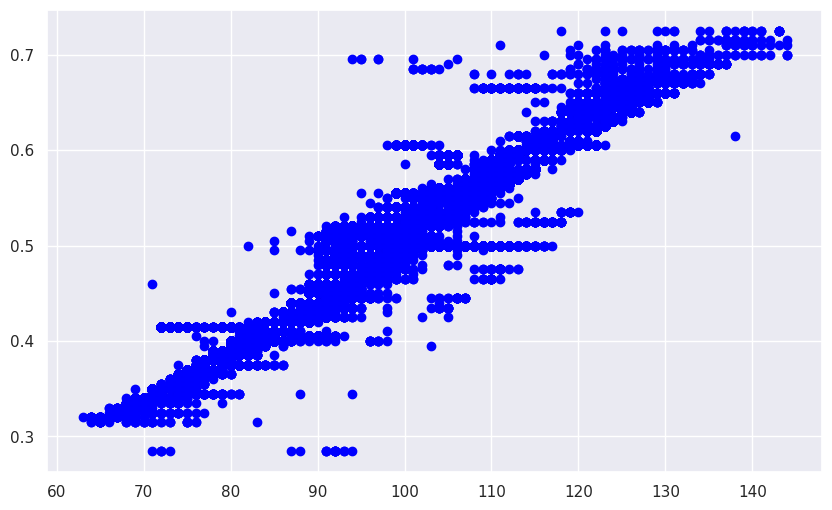

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x= data['all_feature_Sum'], y = data['FloodProbability'], c = 'blue')
plt.show()

## Hyperparameter tunnining of ensemble method

Changes in Iteration(best Model till now)

In [ ]:
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # Load and prepare data (X_train, X_test, y_train, y_test)
# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors','SumClimate','HumanFactors_Sum','water_factors_Sum','land_factors_Sum','all_feature_Sum','InfrastructureQuality']]  # Add more independent variables as needed
# y = data['FloodProbability']
# # Train individual models
# catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6)
# xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)
# lgbm_model = LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)

# catboost_model.fit(X, y)
# xgb_model.fit(X, y)
# lgbm_model.fit(X, y)
# # Make predictions
# catboost_preds = catboost_model.predict(X)
# xgb_preds = xgb_model.predict(X)
# lgbm_preds = lgbm_model.predict(X)

# # Combine predictions (simple averaging for regression)
# ensemble_preds = (catboost_preds + xgb_preds + lgbm_preds) / 3

# # Evaluate ensemble model
# ensemble_r2 = r2_score(y, ensemble_preds)
# ensemble_mse = mean_squared_error(y, ensemble_preds)
# ensemble_mae = mean_absolute_error(y, ensemble_preds)

# print("Ensemble Model R-squared:", ensemble_r2)
# print("Ensemble Model Mean Squared Error:", ensemble_mse)
# print("Ensemble Model Mean Absolute Error:", ensemble_mae)


# Ensemble Model R-squared: 0.8717976736718284
# Ensemble Model Mean Squared Error: 0.0003337952785814508
# Ensemble Model Mean Absolute Error: 0.014257490195129372


## Using RFE to check that the created features overfit the model or not

Recursive feature elimination

In [ ]:
len(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors','SumClimate','HumanFactors_Sum','water_factors_Sum','land_factors_Sum','all_feature_Sum','InfrastructureQuality'])

26

In [ ]:
# from sklearn.feature_selection import RFE
# from catboost import CatBoostRegressor


# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors','SumClimate','HumanFactors_Sum','water_factors_Sum','land_factors_Sum','all_feature_Sum','InfrastructureQuality']]
# y = data['FloodProbability']
# # Define the model
# model = CatBoostRegressor()

# # Perform RFE
# rfe = RFE(estimator=model, n_features_to_select=23)
# rfe.fit(X, y)

# # Get the selected features
# selected_features = X.columns[rfe.support_]
# print("Selected features: ", selected_features)

# # Train the model with selected features
# X_selected = X[selected_features]
# model.fit(X_selected, y)

# # Evaluate the model
# y_pred = model.predict(X_selected)
# print("R-squared: ", model.score(X_selected, y))

# R-squared:  0.869482702209516

model with 23 parameters by RFE.(best model till now)

In [ ]:
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # Load and prepare data (X_train, X_test, y_train, y_test)
# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors', 'HumanFactors_Sum',
#        'land_factors_Sum', 'all_feature_Sum']]  # Add more independent variables as needed
# y = data['FloodProbability']
# # Train individual models
# catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6)
# xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)
# lgbm_model = LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)

# catboost_model.fit(X, y)
# xgb_model.fit(X, y)
# lgbm_model.fit(X, y)
# # Make predictions
# catboost_preds = catboost_model.predict(X)
# xgb_preds = xgb_model.predict(X)
# lgbm_preds = lgbm_model.predict(X)

# # Combine predictions (simple averaging for regression)
# ensemble_preds = (catboost_preds + xgb_preds + lgbm_preds) / 3

# # Evaluate ensemble model
# ensemble_r2 = r2_score(y, ensemble_preds)
# ensemble_mse = mean_squared_error(y, ensemble_preds)
# ensemble_mae = mean_absolute_error(y, ensemble_preds)

# print("Ensemble Model R-squared:", ensemble_r2)
# print("Ensemble Model Mean Squared Error:", ensemble_mse)
# print("Ensemble Model Mean Absolute Error:", ensemble_mae)

# Ensemble Model R-squared: 0.8716728549338968
# Ensemble Model Mean Squared Error: 0.0003341202641460138
# Ensemble Model Mean Absolute Error: 0.014264269932505977


In [ ]:

# # data['all_feature_Sum'] = data['all_feature_Sum'].isin(np.arange(72, 76)) # for linear models
# test_data = df_test[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors', 'HumanFactors_Sum',
#        'land_factors_Sum', 'all_feature_Sum']]

In [ ]:
# # Make predictions
# catboost_preds = catboost_model.predict(test_data)
# xgb_preds = xgb_model.predict(test_data)
# lgbm_preds = lgbm_model.predict(test_data)

# # Combine predictions (simple averaging for regression)
# predictions1= (catboost_preds + xgb_preds + lgbm_preds) / 3

In [ ]:
# pred_formatted1 = ["{:.10f}".format(value) for value in predictions1]
# # # Assuming df_test has index values that you want to include in the CSV file
# # indexes = df_test.index.tolist()

# # Create a DataFrame with indexes and predicted values
# result_df = pd.DataFrame({'id': df_test['id'], 'FloodProbability': pred_formatted1})

# # Save the DataFrame to a CSV file
# result_df.to_csv('Submission9.csv', index=False)

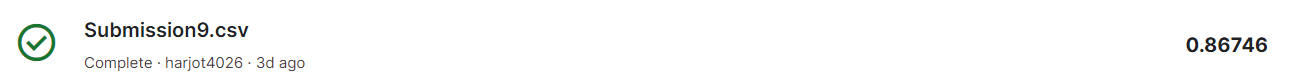

Again running RFE(20)

In [ ]:
# from sklearn.feature_selection import RFE
# from catboost import CatBoostRegressor


# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors','SumClimate','HumanFactors_Sum','water_factors_Sum','land_factors_Sum','all_feature_Sum','InfrastructureQuality']]
# y = data['FloodProbability']
# # Define the model
# model = CatBoostRegressor()

# # Perform RFE
# rfe = RFE(estimator=model, n_features_to_select=20)
# rfe.fit(X, y)

# # Get the selected features
# selected_features = X.columns[rfe.support_]
# print("Selected features: ", selected_features)

# # Train the model with selected features
# X_selected = X[selected_features]
# model.fit(X_selected, y)

# # Evaluate the model
# y_pred = model.predict(X_selected)
# print("R-squared: ", model.score(X_selected, y))


# (['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'DeterioratingInfrastructure',
#        'PopulationScore', 'WetlandLoss', 'InadequatePlanning',
#        'PoliticalFactors', 'all_feature_Sum']


#  R-squared:  0.8693985463559809

In [ ]:
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # Load and prepare data (X_train, X_test, y_train, y_test)
# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'DeterioratingInfrastructure',
#        'PopulationScore', 'WetlandLoss', 'InadequatePlanning',
#        'PoliticalFactors', 'all_feature_Sum']]  # Add more independent variables as needed
# y = data['FloodProbability']
# # Train individual models
# catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6)
# xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)
# lgbm_model = LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)

# catboost_model.fit(X, y)
# xgb_model.fit(X, y)
# lgbm_model.fit(X, y)
# # Make predictions
# catboost_preds = catboost_model.predict(X)
# xgb_preds = xgb_model.predict(X)
# lgbm_preds = lgbm_model.predict(X)

# # Combine predictions (simple averaging for regression)
# ensemble_preds = (catboost_preds + xgb_preds + lgbm_preds) / 3

# # Evaluate ensemble model
# ensemble_r2 = r2_score(y, ensemble_preds)
# ensemble_mse = mean_squared_error(y, ensemble_preds)
# ensemble_mae = mean_absolute_error(y, ensemble_preds)

# print("Ensemble Model R-squared:", ensemble_r2)
# print("Ensemble Model Mean Squared Error:", ensemble_mse)
# print("Ensemble Model Mean Absolute Error:", ensemble_mae)


# Ensemble Model R-squared: 0.8715701412053054
# Ensemble Model Mean Squared Error: 0.00033438769578030073
# Ensemble Model Mean Absolute Error: 0.0142648461362014



In [ ]:

# # data['all_feature_Sum'] = data['all_feature_Sum'].isin(np.arange(72, 76)) # for linear models
# test_data = df_test[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'DeterioratingInfrastructure',
#        'PopulationScore', 'WetlandLoss', 'InadequatePlanning',
#        'PoliticalFactors', 'all_feature_Sum']]

In [ ]:
# # Make predictions
# catboost_preds = catboost_model.predict(test_data)
# xgb_preds = xgb_model.predict(test_data)
# lgbm_preds = lgbm_model.predict(test_data)

# # Combine predictions (simple averaging for regression)
# predictions1= (catboost_preds + xgb_preds + lgbm_preds) / 3

In [ ]:
# pred_formatted1 = ["{:.10f}".format(value) for value in predictions1]
# # # Assuming df_test has index values that you want to include in the CSV file
# # indexes = df_test.index.tolist()

# # Create a DataFrame with indexes and predicted values
# result_df = pd.DataFrame({'id': df_test['id'], 'FloodProbability': pred_formatted1})

# # Save the DataFrame to a CSV file
# result_df.to_csv('Submission10.csv', index=False)

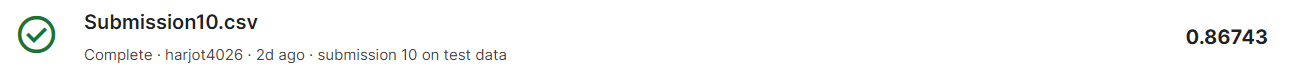

RFE(22)

In [ ]:
# from sklearn.feature_selection import RFE
# from catboost import CatBoostRegressor


# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors','SumClimate','HumanFactors_Sum','water_factors_Sum','land_factors_Sum','all_feature_Sum','InfrastructureQuality']]
# y = data['FloodProbability']
# # Define the model
# model = CatBoostRegressor()

# # Perform RFE
# rfe = RFE(estimator=model, n_features_to_select=22)
# rfe.fit(X, y)

# # Get the selected features
# selected_features = X.columns[rfe.support_]
# print("Selected features: ", selected_features)

# # Train the model with selected features
# X_selected = X[selected_features]
# model.fit(X_selected, y)

# # Evaluate the model
# y_pred = model.predict(X_selected)
# print("R-squared: ", model.score(X_selected, y))

# ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors', 'HumanFactors_Sum',
#        'all_feature_Sum']

#  R-squared:  0.8694686506660074

In [ ]:
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # Load and prepare data (X_train, X_test, y_train, y_test)
# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors', 'HumanFactors_Sum',
#        'all_feature_Sum']]  # Add more independent variables as needed
# y = data['FloodProbability']
# # Train individual models
# catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6)
# xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)
# lgbm_model = LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)

# catboost_model.fit(X, y)
# xgb_model.fit(X, y)
# lgbm_model.fit(X, y)
# # Make predictions
# catboost_preds = catboost_model.predict(X)
# xgb_preds = xgb_model.predict(X)
# lgbm_preds = lgbm_model.predict(X)

# # Combine predictions (simple averaging for regression)
# ensemble_preds = (catboost_preds + xgb_preds + lgbm_preds) / 3

# # Evaluate ensemble model
# ensemble_r2 = r2_score(y, ensemble_preds)
# ensemble_mse = mean_squared_error(y, ensemble_preds)
# ensemble_mae = mean_absolute_error(y, ensemble_preds)

# print("Ensemble Model R-squared:", ensemble_r2)
# print("Ensemble Model Mean Squared Error:", ensemble_mse)
# print("Ensemble Model Mean Absolute Error:", ensemble_mae)


# Ensemble Model R-squared: 0.8716819810333843
# Ensemble Model Mean Squared Error: 0.0003340965028851377
# Ensemble Model Mean Absolute Error: 0.01426176392708424



In [ ]:

# # data['all_feature_Sum'] = data['all_feature_Sum'].isin(np.arange(72, 76)) # for linear models
# test_data = df_test[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors', 'HumanFactors_Sum',
#        'all_feature_Sum']]

In [ ]:
# # Make predictions
# catboost_preds = catboost_model.predict(test_data)
# xgb_preds = xgb_model.predict(test_data)
# lgbm_preds = lgbm_model.predict(test_data)

# # Combine predictions (simple averaging for regression)
# predictions1= (catboost_preds + xgb_preds + lgbm_preds) / 3

In [ ]:
# pred_formatted1 = ["{:.10f}".format(value) for value in predictions1]
# # # Assuming df_test has index values that you want to include in the CSV file
# # indexes = df_test.index.tolist()

# # Create a DataFrame with indexes and predicted values
# result_df = pd.DataFrame({'id': df_test['id'], 'FloodProbability': pred_formatted1})

# # Save the DataFrame to a CSV file
# result_df.to_csv('Submission11.csv', index=False)

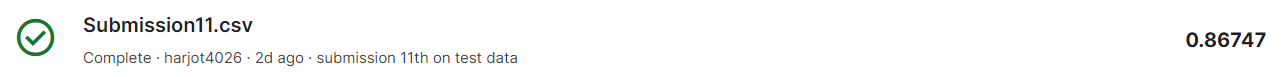

RFE(21)

In [ ]:
# from sklearn.feature_selection import RFE
# from catboost import CatBoostRegressor


# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors','SumClimate','HumanFactors_Sum','water_factors_Sum','land_factors_Sum','all_feature_Sum','InfrastructureQuality']]
# y = data['FloodProbability']
# # Define the model
# model = CatBoostRegressor()

# # Perform RFE
# rfe = RFE(estimator=model, n_features_to_select=21)
# rfe.fit(X, y)

# # Get the selected features
# selected_features = X.columns[rfe.support_]
# print("Selected features: ", selected_features)

# # Train the model with selected features
# X_selected = X[selected_features]
# model.fit(X_selected, y)

# # Evaluate the model
# y_pred = model.predict(X_selected)
# print("R-squared: ", model.score(X_selected, y))

# R-squared:  0.869474476931405
# ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors', 'all_feature_Sum']

In [ ]:
# from catboost import CatBoostRegressor               # Best Model till now
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # Load and prepare data (X_train, X_test, y_train, y_test)
# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors', 'all_feature_Sum']]  # Add more independent variables as needed
# y = data['FloodProbability']
# # Train individual models
# catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6)
# xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)
# lgbm_model = LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)

# catboost_model.fit(X, y)
# xgb_model.fit(X, y)
# lgbm_model.fit(X, y)
# # Make predictions
# catboost_preds = catboost_model.predict(X)
# xgb_preds = xgb_model.predict(X)
# lgbm_preds = lgbm_model.predict(X)

# # Combine predictions (simple averaging for regression)
# ensemble_preds = (catboost_preds + xgb_preds + lgbm_preds) / 3

# # Evaluate ensemble model
# ensemble_r2 = r2_score(y, ensemble_preds)
# ensemble_mse = mean_squared_error(y, ensemble_preds)
# ensemble_mae = mean_absolute_error(y, ensemble_preds)

# print("Ensemble Model R-squared:", ensemble_r2)
# print("Ensemble Model Mean Squared Error:", ensemble_mse)
# print("Ensemble Model Mean Absolute Error:", ensemble_mae)


# Ensemble Model R-squared: 0.871706845210038
# Ensemble Model Mean Squared Error: 0.000334031765021087
# Ensemble Model Mean Absolute Error: 0.014258589044368579



In [ ]:

# # data['all_feature_Sum'] = data['all_feature_Sum'].isin(np.arange(72, 76)) # for linear models
# test_data = df_test[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors', 'all_feature_Sum']]

In [ ]:
# # Make predictions
# catboost_preds = catboost_model.predict(test_data)
# xgb_preds = xgb_model.predict(test_data)
# lgbm_preds = lgbm_model.predict(test_data)

# # Combine predictions (simple averaging for regression)
# predictions1= (catboost_preds + xgb_preds + lgbm_preds) / 3

In [ ]:
# pred_formatted1 = ["{:.10f}".format(value) for value in predictions1]
# # # Assuming df_test has index values that you want to include in the CSV file
# # indexes = df_test.index.tolist()

# # Create a DataFrame with indexes and predicted values
# result_df = pd.DataFrame({'id': df_test['id'], 'FloodProbability': pred_formatted1})

# # Save the DataFrame to a CSV file
# result_df.to_csv('Submission12.csv', index=False)

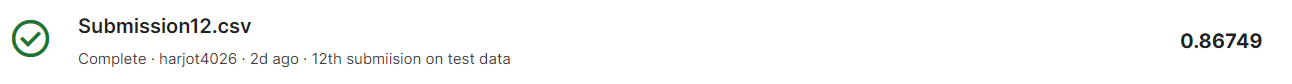

## Trying to add polynomial features to the model(if it captures the good relation of data points or not?)

polynomial

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# X= data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors', 'all_feature_Sum']]
# # Create polynomial features
# poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
# X_poly = poly.fit_transform(X)

# # Train the model with polynomial features
# model = CatBoostRegressor()
# model.fit(X_poly, y)

# # Evaluate the model
# y_pred = model.predict(X_poly)
# print("R-squared: ", model.score(X_poly, y))

# R-squared:  0.8698792767162074

In [ ]:
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# X= data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors', 'all_feature_Sum']]
# # Create polynomial features
# poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
# X_poly = poly.fit_transform(X) # Add more independent variables as needed
# y = data['FloodProbability']
# # Train individual models
# catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6)
# xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)
# lgbm_model = LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)

# catboost_model.fit(X_poly, y)
# xgb_model.fit(X_poly, y)
# lgbm_model.fit(X_poly, y)
# # Make predictions
# catboost_preds = catboost_model.predict(X_poly)
# xgb_preds = xgb_model.predict(X_poly)
# lgbm_preds = lgbm_model.predict(X_poly)

# # Combine predictions (simple averaging for regression)
# ensemble_preds = (catboost_preds + xgb_preds + lgbm_preds) / 3

# # Evaluate ensemble model
# ensemble_r2 = r2_score(y, ensemble_preds)
# ensemble_mse = mean_squared_error(y, ensemble_preds)
# ensemble_mae = mean_absolute_error(y, ensemble_preds)

# print("Ensemble Model R-squared:", ensemble_r2)
# print("Ensemble Model Mean Squared Error:", ensemble_mse)
# print("Ensemble Model Mean Absolute Error:", ensemble_mae)

# Ensemble Model R-squared: 0.8741587224791293
# Ensemble Model Mean Squared Error: 0.00032764791006677956
# Ensemble Model Mean Absolute Error: 0.014146280237636573



In [ ]:
# X= df_test[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors', 'all_feature_Sum']]
# # Create polynomial features
# poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
# X_poly = poly.fit_transform(X)

In [ ]:
# # Make predictions
# catboost_preds = catboost_model.predict(X_poly)
# xgb_preds = xgb_model.predict(X_poly)
# lgbm_preds = lgbm_model.predict(X_poly)

# # Combine predictions (simple averaging for regression)
# predictions1= (catboost_preds + xgb_preds + lgbm_preds) / 3

In [ ]:
# pred_formatted1 = ["{:.10f}".format(value) for value in predictions1]
# # # Assuming df_test has index values that you want to include in the CSV file
# # indexes = df_test.index.tolist()

# # Create a DataFrame with indexes and predicted values
# result_df = pd.DataFrame({'id': df_test['id'], 'FloodProbability': pred_formatted1})

# # Save the DataFrame to a CSV file
# result_df.to_csv('Submission13.csv', index=False)

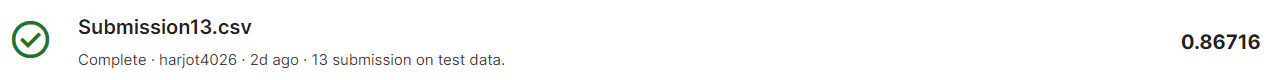

## Checking the importance criteria of features by utilizing  catboost@

Importance

In [ ]:
from catboost import CatBoostRegressor, Pool
import pandas as pd
import numpy as np

X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'all_feature_Sum']]  # Add more independent variables as needed
y = data['FloodProbability']

# Define and train the initial CatBoost model
model = CatBoostRegressor(verbose=0)
model.fit(X, y)

# Get feature importance scores
feature_importances = model.get_feature_importance()
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature importances:\n", feature_importance_df)

# Decide on a threshold to drop less important features (e.g., keep top 80% cumulative importance)
cumulative_importance = np.cumsum(feature_importance_df['Importance'])
feature_importance_df['CumulativeImportance'] = cumulative_importance
threshold = 0.80
important_features = feature_importance_df[feature_importance_df['CumulativeImportance'] <= threshold]['Feature']

# Select the important features
X_selected = X[important_features]

# # Train a new model with the selected features
# model_selected = CatBoostRegressor(verbose=0)
# model_selected.fit(X_selected, y)

# # Evaluate the new model
# y_pred = model_selected.predict(X_selected)
# print("R-squared with selected features: ", model_selected.score(X_selected, y))

Feature importances:
                             Feature  Importance
20                  all_feature_Sum   97.437785
0                  MonsoonIntensity    0.240103
18               InadequatePlanning    0.164774
10  IneffectiveDisasterPreparedness    0.163558
7                         Siltation    0.160535
15      DeterioratingInfrastructure    0.159110
1                TopographyDrainage    0.145766
9                     Encroachments    0.144977
6                       DamsQuality    0.141043
11                  DrainageSystems    0.123910
8             AgriculturalPractices    0.112653
3                     Deforestation    0.109460
17                      WetlandLoss    0.108813
13                       Landslides    0.106185
2                   RiverManagement    0.104144
12             CoastalVulnerability    0.102338
19                 PoliticalFactors    0.097480
5                     ClimateChange    0.097354
16                  PopulationScore    0.095535
4                 

In [ ]:
l =   ['all_feature_Sum','MonsoonIntensity','InadequatePlanning','IneffectiveDisasterPreparedness','Siltation','DeterioratingInfrastructure','TopographyDrainage','Encroachments','DamsQuality','DrainageSystems','AgriculturalPractices','Deforestation','WetlandLoss','Landslides','RiverManagement','CoastalVulnerability','PoliticalFactors','ClimateChange','PopulationScore'  ,'Urbanization','Watersheds' ]

In [ ]:
# from catboost import CatBoostRegressor               # Best Model till now
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # Load and prepare data (X_train, X_test, y_train, y_test)
# X = data[['all_feature_Sum','MonsoonIntensity','InadequatePlanning','IneffectiveDisasterPreparedness','Siltation',
#           'DeterioratingInfrastructure','TopographyDrainage','Encroachments','DamsQuality','DrainageSystems','AgriculturalPractices','Deforestation','WetlandLoss',
#           'Landslides','RiverManagement','CoastalVulnerability','PoliticalFactors','ClimateChange','PopulationScore'  ,'Urbanization','Watersheds' ]]  # Add more independent variables as needed
# y = data['FloodProbability']
# # Train individual models
# catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6)
# xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)
# lgbm_model = LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)

# catboost_model.fit(X, y)
# xgb_model.fit(X, y)
# lgbm_model.fit(X, y)
# # Make predictions
# catboost_preds = catboost_model.predict(X)
# xgb_preds = xgb_model.predict(X)
# lgbm_preds = lgbm_model.predict(X)

# # Combine predictions (simple averaging for regression)
# ensemble_preds = (catboost_preds + xgb_preds + lgbm_preds) / 3

# # Evaluate ensemble model
# ensemble_r2 = r2_score(y, ensemble_preds)
# ensemble_mse = mean_squared_error(y, ensemble_preds)
# ensemble_mae = mean_absolute_error(y, ensemble_preds)

# print("Ensemble Model R-squared:", ensemble_r2)
# print("Ensemble Model Mean Squared Error:", ensemble_mse)
# print("Ensemble Model Mean Absolute Error:", ensemble_mae)


# Ensemble Model R-squared: 0.8717306751382591
# Ensemble Model Mean Squared Error: 0.000333969719988388
# Ensemble Model Mean Absolute Error: 0.014258222077474647


warning corrected

In [ ]:
from catboost import CatBoostRegressor    #(best model till now)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load and prepare data (X_train, X_test, y_train, y_test)
X = data[['all_feature_Sum','MonsoonIntensity','InadequatePlanning',
          'IneffectiveDisasterPreparedness','Siltation',
          'DeterioratingInfrastructure','TopographyDrainage',
          'Encroachments','DamsQuality','DrainageSystems','AgriculturalPractices',
          'Deforestation','WetlandLoss',
          'Landslides','RiverManagement','CoastalVulnerability','PoliticalFactors',
          'ClimateChange','PopulationScore','Urbanization','Watersheds']]  # Add more independent variables as needed
y = data['FloodProbability']

# Train individual models
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6)
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)
lgbm_model = LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6, num_leaves=64)

catboost_model.fit(X, y)
xgb_model.fit(X, y)
lgbm_model.fit(X, y)

# Make predictions
catboost_preds = catboost_model.predict(X)
xgb_preds = xgb_model.predict(X)
lgbm_preds = lgbm_model.predict(X)

# Combine predictions (simple averaging for regression)
ensemble_preds = (catboost_preds + xgb_preds + lgbm_preds) / 3

# Evaluate ensemble model
ensemble_r2 = r2_score(y, ensemble_preds)
ensemble_mse = mean_squared_error(y, ensemble_preds)
ensemble_mae = mean_absolute_error(y, ensemble_preds)

print("Ensemble Model R-squared:", ensemble_r2)
print("Ensemble Model Mean Squared Error:", ensemble_mse)
print("Ensemble Model Mean Absolute Error:", ensemble_mae)

# Ensemble Model R-squared: 0.8721562116242145
# Ensemble Model Mean Squared Error: 0.0003328617676294545
# Ensemble Model Mean Absolute Error: 0.01422984975770447


0:	learn: 0.0468451	total: 247ms	remaining: 4m 6s
1:	learn: 0.0431341	total: 441ms	remaining: 3m 40s
2:	learn: 0.0397993	total: 621ms	remaining: 3m 26s
3:	learn: 0.0368738	total: 800ms	remaining: 3m 19s
4:	learn: 0.0343256	total: 986ms	remaining: 3m 16s
5:	learn: 0.0320731	total: 1.18s	remaining: 3m 14s
6:	learn: 0.0301302	total: 1.37s	remaining: 3m 14s
7:	learn: 0.0284386	total: 1.55s	remaining: 3m 12s
8:	learn: 0.0269670	total: 1.73s	remaining: 3m 10s
9:	learn: 0.0257009	total: 1.91s	remaining: 3m 8s
10:	learn: 0.0246182	total: 2.09s	remaining: 3m 7s
11:	learn: 0.0236921	total: 2.29s	remaining: 3m 8s
12:	learn: 0.0229005	total: 2.47s	remaining: 3m 7s
13:	learn: 0.0222325	total: 2.64s	remaining: 3m 6s
14:	learn: 0.0216705	total: 2.83s	remaining: 3m 5s
15:	learn: 0.0212040	total: 3.01s	remaining: 3m 5s
16:	learn: 0.0208067	total: 3.21s	remaining: 3m 5s
17:	learn: 0.0204775	total: 3.38s	remaining: 3m 4s
18:	learn: 0.0202010	total: 3.55s	remaining: 3m 3s
19:	learn: 0.0199709	total: 3.72s

In [ ]:

# data['all_feature_Sum'] = data['all_feature_Sum'].isin(np.arange(72, 76)) # for linear models
test_data = df_test[['all_feature_Sum','MonsoonIntensity','InadequatePlanning','IneffectiveDisasterPreparedness','Siltation',
          'DeterioratingInfrastructure','TopographyDrainage','Encroachments','DamsQuality','DrainageSystems','AgriculturalPractices','Deforestation','WetlandLoss',
          'Landslides','RiverManagement','CoastalVulnerability','PoliticalFactors','ClimateChange','PopulationScore','Urbanization','Watersheds']]

In [ ]:
# Make predictions
catboost_preds = catboost_model.predict(test_data)
xgb_preds = xgb_model.predict(test_data)
lgbm_preds = lgbm_model.predict(test_data)

# Combine predictions (simple averaging for regression)
predictions1= (catboost_preds + xgb_preds + lgbm_preds) / 3

In [ ]:
pred_formatted1 = ["{:.10f}".format(value) for value in predictions1]
# # Assuming df_test has index values that you want to include in the CSV file
# indexes = df_test.index.tolist()

# Create a DataFrame with indexes and predicted values
result_df = pd.DataFrame({'id': df_test['id'], 'FloodProbability': pred_formatted1})

# Save the DataFrame to a CSV file
result_df.to_csv('Submission14.csv', index=False)

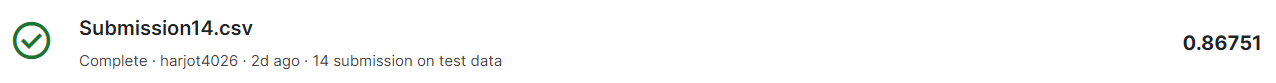

## Removing the last non important feature from the list given by important features(Wetsheds)

In [ ]:
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # Load and prepare data (X_train, X_test, y_train, y_test)
# X = data[['all_feature_Sum','MonsoonIntensity','InadequatePlanning','IneffectiveDisasterPreparedness','Siltation',
#           'DeterioratingInfrastructure','TopographyDrainage','Encroachments','DamsQuality','DrainageSystems','AgriculturalPractices','Deforestation','WetlandLoss',
#           'Landslides','RiverManagement','CoastalVulnerability','PoliticalFactors','ClimateChange','PopulationScore','Urbanization']]  # Add more independent variables as needed
# y = data['FloodProbability']

# # Train individual models
# catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6)
# xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)
# lgbm_model = LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6, num_leaves=64)

# catboost_model.fit(X, y)
# xgb_model.fit(X, y)
# lgbm_model.fit(X, y)

# # Make predictions
# catboost_preds = catboost_model.predict(X)
# xgb_preds = xgb_model.predict(X)
# lgbm_preds = lgbm_model.predict(X)

# # Combine predictions (simple averaging for regression)
# ensemble_preds = (catboost_preds + xgb_preds + lgbm_preds) / 3

# # Evaluate ensemble model
# ensemble_r2 = r2_score(y, ensemble_preds)
# ensemble_mse = mean_squared_error(y, ensemble_preds)
# ensemble_mae = mean_absolute_error(y, ensemble_preds)

# print("Ensemble Model R-squared:", ensemble_r2)
# print("Ensemble Model Mean Squared Error:", ensemble_mse)
# print("Ensemble Model Mean Absolute Error:", ensemble_mae)

# Ensemble Model R-squared: 0.8719556074610517
# Ensemble Model Mean Squared Error: 0.0003333840726799583
# Ensemble Model Mean Absolute Error: 0.014239201141025492


In [ ]:

# # data['all_feature_Sum'] = data['all_feature_Sum'].isin(np.arange(72, 76)) # for linear models
# test_data = df_test[['all_feature_Sum','MonsoonIntensity','InadequatePlanning','IneffectiveDisasterPreparedness','Siltation',
#           'DeterioratingInfrastructure','TopographyDrainage','Encroachments','DamsQuality','DrainageSystems','AgriculturalPractices','Deforestation','WetlandLoss',
#           'Landslides','RiverManagement','CoastalVulnerability','PoliticalFactors','ClimateChange','PopulationScore','Urbanization']]

In [ ]:
# # Make predictions
# catboost_preds = catboost_model.predict(test_data)
# xgb_preds = xgb_model.predict(test_data)
# lgbm_preds = lgbm_model.predict(test_data)

# # Combine predictions (simple averaging for regression)
# predictions1= (catboost_preds + xgb_preds + lgbm_preds) / 3

In [ ]:
# pred_formatted1 = ["{:.10f}".format(value) for value in predictions1]
# # # Assuming df_test has index values that you want to include in the CSV file
# # indexes = df_test.index.tolist()

# # Create a DataFrame with indexes and predicted values
# result_df = pd.DataFrame({'id': df_test['id'], 'FloodProbability': pred_formatted1})

# # Save the DataFrame to a CSV file
# result_df.to_csv('Submission15.csv', index=False)

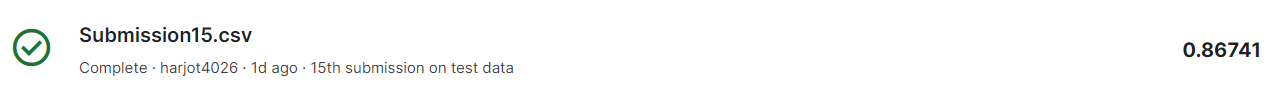

## Hyperparameter tuning of the best model

hyperparameter tuning in best model(Sub 14)

In [ ]:
# from catboost import CatBoostRegressor    #(best model till now)
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # Load and prepare data (X_train, X_test, y_train, y_test)
# X = data[['all_feature_Sum','MonsoonIntensity','InadequatePlanning',
#           'IneffectiveDisasterPreparedness','Siltation',
#           'DeterioratingInfrastructure','TopographyDrainage',
#           'Encroachments','DamsQuality','DrainageSystems','AgriculturalPractices',
#           'Deforestation','WetlandLoss',
#           'Landslides','RiverManagement','CoastalVulnerability','PoliticalFactors',
#           'ClimateChange','PopulationScore','Urbanization','Watersheds']]  # Add more independent variables as needed
# y = data['FloodProbability']

# # Train individual models
# catboost_model = CatBoostRegressor(n_estimators=8000, learning_rate=0.011277016304363601,
#                                    depth=8, min_data_in_leaf=98, random_state=0,
#                                    task_type='CPU', devices='0', verbose=False)
# xgb_model = XGBRegressor(n_estimators=8000, max_depth=9,
#                          learning_rate=0.05371502553155743,
#                          subsample=0.85715838272758116,
#                          colsample_bytree=0.892390046436166,
#                          gamma=0.012984290742285246,
#                          min_child_weight=3, random_state=0)
# lgbm_model = LGBMRegressor(boosting_type='gbdt', n_estimators=2000,
#                            learning_rate=0.012, num_leaves=250,
#                            subsample_for_bin=165700, min_child_samples=114,
#                            reg_alpha=2.075e-06, reg_lambda=3.839e-07,
#                            colsample_bytree=0.9634, subsample=0.9592,
#                            max_depth=10, random_state=0, verbose=0)

# catboost_model.fit(X, y)
# xgb_model.fit(X, y)
# lgbm_model.fit(X, y)

# # Make predictions
# catboost_preds = catboost_model.predict(X)
# xgb_preds = xgb_model.predict(X)
# lgbm_preds = lgbm_model.predict(X)

# # Combine predictions (simple averaging for regression)
# ensemble_preds = (catboost_preds + xgb_preds + lgbm_preds) / 3

# # Evaluate ensemble model
# ensemble_r2 = r2_score(y, ensemble_preds)
# ensemble_mse = mean_squared_error(y, ensemble_preds)
# ensemble_mae = mean_absolute_error(y, ensemble_preds)

# print("Ensemble Model R-squared:", ensemble_r2)
# print("Ensemble Model Mean Squared Error:", ensemble_mse)
# print("Ensemble Model Mean Absolute Error:", ensemble_mae)


In [ ]:

# # data['all_feature_Sum'] = data['all_feature_Sum'].isin(np.arange(72, 76)) # for linear models
# test_data = df_test[['all_feature_Sum','MonsoonIntensity','InadequatePlanning','IneffectiveDisasterPreparedness','Siltation',
#           'DeterioratingInfrastructure','TopographyDrainage','Encroachments','DamsQuality','DrainageSystems','AgriculturalPractices','Deforestation','WetlandLoss',
#           'Landslides','RiverManagement','CoastalVulnerability','PoliticalFactors','ClimateChange','PopulationScore','Urbanization','Watersheds']]

In [ ]:
# # Make predictions
# catboost_preds = catboost_model.predict(test_data)
# xgb_preds = xgb_model.predict(test_data)
# lgbm_preds = lgbm_model.predict(test_data)

# # Combine predictions (simple averaging for regression)
# predictions1= (catboost_preds + xgb_preds + lgbm_preds) / 3

In [ ]:
# pred_formatted1 = ["{:.10f}".format(value) for value in predictions1]
# # # Assuming df_test has index values that you want to include in the CSV file
# # indexes = df_test.index.tolist()

# # Create a DataFrame with indexes and predicted values
# result_df = pd.DataFrame({'id': df_test['id'], 'FloodProbability': pred_formatted1})

# # Save the DataFrame to a CSV file
# result_df.to_csv('Submission18.csv', index=False)

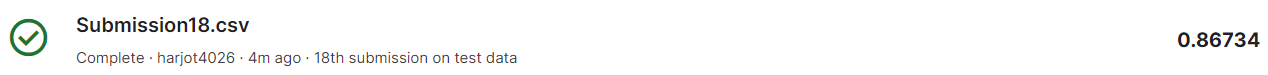

Using Neural Networks for impplementing Ensemble Learning. Took 5 hrs for training

Ensemble learning using neural networks

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam

# # Load and prepare data
# X = data[['all_feature_Sum', 'MonsoonIntensity', 'InadequatePlanning', 'IneffectiveDisasterPreparedness', 'Siltation',
#           'DeterioratingInfrastructure', 'TopographyDrainage', 'Encroachments', 'DamsQuality', 'DrainageSystems', 'AgriculturalPractices', 'Deforestation', 'WetlandLoss',
#           'Landslides', 'RiverManagement', 'CoastalVulnerability', 'PoliticalFactors', 'ClimateChange', 'PopulationScore', 'Urbanization', 'Watersheds']]
# y = data['FloodProbability']

# # Function to build a neural network model
# def build_model():
#     model = Sequential()
#     model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dense(1))
#     model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
#     return model

# # Train individual models
# nn_model1 = build_model()
# nn_model2 = build_model()
# nn_model3 = build_model()

# nn_model1.fit(X, y, epochs=100, batch_size=32, verbose=0)
# nn_model2.fit(X, y, epochs=100, batch_size=32, verbose=0)
# nn_model3.fit(X, y, epochs=100, batch_size=32, verbose=0)

# # Make predictions
# nn_preds1 = nn_model1.predict(X).flatten()
# nn_preds2 = nn_model2.predict(X).flatten()
# nn_preds3 = nn_model3.predict(X).flatten()

# # Combine predictions (simple averaging for regression)
# ensemble_preds = (nn_preds1 + nn_preds2 + nn_preds3) / 3

# # Evaluate ensemble model
# ensemble_r2 = r2_score(y, ensemble_preds)
# ensemble_mse = mean_squared_error(y, ensemble_preds)
# ensemble_mae = mean_absolute_error(y, ensemble_preds)

# print("Ensemble Model R-squared:", ensemble_r2)
# print("Ensemble Model Mean Squared Error:", ensemble_mse)
# print("Ensemble Model Mean Absolute Error:", ensemble_mae)



# 34937/34937 [==============================] - 52s 1ms/step
# 34937/34937 [==============================] - 58s 2ms/step
# 34937/34937 [==============================] - 51s 1ms/step
# Ensemble Model R-squared: 0.7457438493806126
# Ensemble Model Mean Squared Error: 0.000661996588188246
# Ensemble Model Mean Absolute Error: 0.02133194816984902


## We run the grid search for finding the best parameters for the model, and given to the algoritms

In [ ]:
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # Load and prepare data (X_train, X_test, y_train, y_test)
# X = data[['all_feature_Sum','MonsoonIntensity','InadequatePlanning','IneffectiveDisasterPreparedness','Siltation',
#           'DeterioratingInfrastructure','TopographyDrainage','Encroachments','DamsQuality','DrainageSystems','AgriculturalPractices','Deforestation','WetlandLoss',
#           'Landslides','RiverManagement','CoastalVulnerability','PoliticalFactors','ClimateChange','PopulationScore','Urbanization','Watersheds']]  # Add more independent variables as needed
# y = data['FloodProbability']

# # Train individual models
# catboost_model = CatBoostRegressor(iterations=462, learning_rate=0.2024113650501809, depth=7, verbose = 5)
# xgb_model = XGBRegressor(n_estimators=462, learning_rate=0.2024113650501809, max_depth=7, verbose = 5)
# lgbm_model = LGBMRegressor(n_estimators=462, learning_rate=0.2024113650501809, max_depth=7, num_leaves=128, verbose = 5)

# catboost_model.fit(X, y)
# xgb_model.fit(X, y)
# lgbm_model.fit(X, y)

# # Make predictions
# catboost_preds = catboost_model.predict(X)
# xgb_preds = xgb_model.predict(X)
# lgbm_preds = lgbm_model.predict(X)

# # Combine predictions (simple averaging for regression)
# ensemble_preds = (catboost_preds + xgb_preds + lgbm_preds) / 3

# # Evaluate ensemble model
# ensemble_r2 = r2_score(y, ensemble_preds)
# ensemble_mse = mean_squared_error(y, ensemble_preds)
# ensemble_mae = mean_absolute_error(y, ensemble_preds)

# print("Ensemble Model R-squared:", ensemble_r2)
# print("Ensemble Model Mean Squared Error:", ensemble_mse)
# print("Ensemble Model Mean Absolute Error:", ensemble_mae)

# Ensemble Model R-squared: 0.8750082307851705
# Ensemble Model Mean Squared Error: 0.000325436079206968
# Ensemble Model Mean Absolute Error: 0.01406156017085428


In [ ]:

# # data['all_feature_Sum'] = data['all_feature_Sum'].isin(np.arange(72, 76)) # for linear models
# test_data = df_test[['all_feature_Sum','MonsoonIntensity','InadequatePlanning','IneffectiveDisasterPreparedness','Siltation',
#           'DeterioratingInfrastructure','TopographyDrainage','Encroachments','DamsQuality','DrainageSystems','AgriculturalPractices','Deforestation','WetlandLoss',
#           'Landslides','RiverManagement','CoastalVulnerability','PoliticalFactors','ClimateChange','PopulationScore','Urbanization','Watersheds']]

In [ ]:
# # Make predictions
# catboost_preds = catboost_model.predict(test_data)
# xgb_preds = xgb_model.predict(test_data)
# lgbm_preds = lgbm_model.predict(test_data)

# # Combine predictions (simple averaging for regression)
# predictions1= (catboost_preds + xgb_preds + lgbm_preds) / 3

In [ ]:
# pred_formatted1 = ["{:.10f}".format(value) for value in predictions1]
# # # Assuming df_test has index values that you want to include in the CSV file
# # indexes = df_test.index.tolist()

# # Create a DataFrame with indexes and predicted values
# result_df = pd.DataFrame({'id': df_test['id'], 'FloodProbability': pred_formatted1})

# # Save the DataFrame to a CSV file
# result_df.to_csv('Submission16.csv', index=False)

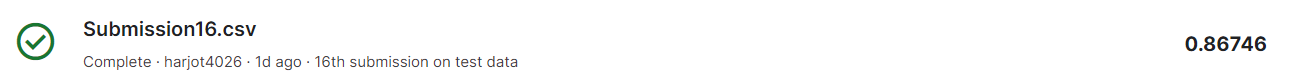

## Trying to create a new variable using weights, by assigning weights accroding to the correlation.

In [ ]:
# # Your selected variables and target variable
# selected_variables = [
#     'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#     'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#     'Siltation', 'AgriculturalPractices', 'Encroachments',
#     'IneffectiveDisasterPreparedness', 'DrainageSystems',
#     'CoastalVulnerability', 'Landslides', 'Watersheds',
#     'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#     'InadequatePlanning', 'PoliticalFactors'
# ]
# target_variable = 'FloodProbability'  # Replace with your actual target variable name


# # Check for missing values and handle them if necessary
# data.fillna(data.mean(), inplace=True)

# # Ensure all selected variables and the target variable are numeric
# data[selected_variables] = data[selected_variables].apply(pd.to_numeric, errors='coerce')
# data[target_variable] = pd.to_numeric(data[target_variable], errors='coerce')

# # Drop any rows with missing values that remain after coercion
# data.dropna(inplace=True)

# # Calculate correlation coefficients between selected predictors and target variable
# correlations = data[selected_variables].corrwith(data[target_variable])

# # Sort correlations in ascending order
# sorted_correlations = correlations.abs().sort_values()

# # Assign weights based on sorted correlations
# min_weight = 1
# max_weight = 2

# # Normalize the sorted correlations to the range [1, 2]
# normalized_weights = 1 + (sorted_correlations - sorted_correlations.min()) * (max_weight - min_weight) / (sorted_correlations.max() - sorted_correlations.min())

# # Create a dictionary for the weights
# weights = {var: weight for var, weight in normalized_weights.items()}

# # Print weights for verification
# print("Weights assigned to features based on correlation with the target variable:")
# for var, weight in weights.items():
#     print(f"{var}: {weight:.2f}")

In [ ]:
# # Create a new feature by multiplying each feature by its corresponding weight and summing the results
# data['WeightedSum'] = sum(data[var] * weight for var, weight in weights.items())

# # Print the first few rows of the dataset to verify the new feature
# print(data['WeightedSum'])

In [ ]:
# # Create a new feature by multiplying each feature by its corresponding weight and summing the results
# df_test['WeightedSum'] = sum(df_test[var] * weight for var, weight in weights.items())

# # Print the first few rows of the dataset to verify the new feature
# print(df_test['WeightedSum'])

## Running ensemble by adding weight variable to the model.

In [ ]:
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # Load and prepare data (X_train, X_test, y_train, y_test)
# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors','SumClimate','HumanFactors_Sum','water_factors_Sum','land_factors_Sum','all_feature_Sum','InfrastructureQuality','WeightedSum']]  # Add more independent variables as needed
# y = data['FloodProbability']
# # Train individual models
# catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6)
# xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)
# lgbm_model = LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)

# catboost_model.fit(X, y)
# xgb_model.fit(X, y)
# lgbm_model.fit(X, y)
# # Make predictions
# catboost_preds = catboost_model.predict(X)
# xgb_preds = xgb_model.predict(X)
# lgbm_preds = lgbm_model.predict(X)

# # Combine predictions (simple averaging for regression)
# ensemble_preds = (catboost_preds + xgb_preds + lgbm_preds) / 3

# # Evaluate ensemble model
# ensemble_r2 = r2_score(y, ensemble_preds)
# ensemble_mse = mean_squared_error(y, ensemble_preds)
# ensemble_mae = mean_absolute_error(y, ensemble_preds)

# print("Ensemble Model R-squared:", ensemble_r2)
# print("Ensemble Model Mean Squared Error:", ensemble_mse)
# print("Ensemble Model Mean Absolute Error:", ensemble_mae)

# Ensemble Model R-squared: 0.8719856493337763
# Ensemble Model Mean Squared Error: 0.0003333058538553671
# Ensemble Model Mean Absolute Error: 0.014252075480815222





In [ ]:
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # Load and prepare data (X_train, X_test, y_train, y_test)
# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors','SumClimate','HumanFactors_Sum','water_factors_Sum','land_factors_Sum','all_feature_Sum','InfrastructureQuality','WeightedSum']]  # Add more independent variables as needed
# y = data['FloodProbability']
# # Train individual models
# # catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6)
# xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)
# # lgbm_model = LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)

# # catboost_model.fit(X, y)
# xgb_model.fit(X, y)
# # lgbm_model.fit(X, y)
# # Make predictions
# # catboost_preds = catboost_model.predict(X)
# xgb_preds = xgb_model.predict(X)
# # lgbm_preds = lgbm_model.predict(X)

# # Combine predictions (simple averaging for regression)
# ensemble_preds =  xgb_preds

# # Evaluate ensemble model
# ensemble_r2 = r2_score(y, ensemble_preds)
# ensemble_mse = mean_squared_error(y, ensemble_preds)
# ensemble_mae = mean_absolute_error(y, ensemble_preds)

# print("Ensemble Model R-squared:", ensemble_r2)
# print("Ensemble Model Mean Squared Error:", ensemble_mse)
# print("Ensemble Model Mean Absolute Error:", ensemble_mae)


# Ensemble Model R-squared: 0.874207309587973
# Ensemble Model Mean Squared Error: 0.00032752140575132403
# Ensemble Model Mean Absolute Error: 0.01411373342942549




## Added  more models to ensemble method , but failed due to less computational power

Strong ensemble

In [ ]:
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # Load and prepare data (X_train, X_test, y_train, y_test)
# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors','SumClimate','HumanFactors_Sum','water_factors_Sum','land_factors_Sum','all_feature_Sum','InfrastructureQuality']]  # Add more independent variables as needed
# y = data['FloodProbability']

# # Train individual models
# catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=0)
# xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)
# lgbm_model = LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)
# # rf_model = RandomForestRegressor(n_estimators=1000, max_depth=6)
# gb_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)
# ada_model = AdaBoostRegressor(n_estimators=1000, learning_rate=0.1)
# hist_gb_model = HistGradientBoostingRegressor(max_iter=1000, learning_rate=0.1, max_depth=6)

# catboost_model.fit(X, y)
# xgb_model.fit(X, y)
# lgbm_model.fit(X, y)
# # rf_model.fit(X, y)
# gb_model.fit(X, y)
# ada_model.fit(X, y)
# hist_gb_model.fit(X, y)

# # Make predictions
# catboost_preds = catboost_model.predict(X)
# xgb_preds = xgb_model.predict(X)
# lgbm_preds = lgbm_model.predict(X)
# # rf_preds = rf_model.predict(X)
# gb_preds = gb_model.predict(X)
# ada_preds = ada_model.predict(X)
# hist_gb_preds = hist_gb_model.predict(X)

# # Combine predictions (simple averaging for regression)
# ensemble_preds = (catboost_preds + xgb_preds + lgbm_preds +  gb_preds + ada_preds + hist_gb_preds) / 6

# # Evaluate ensemble model
# ensemble_r2 = r2_score(y, ensemble_preds)
# ensemble_mse = mean_squared_error(y, ensemble_preds)
# ensemble_mae = mean_absolute_error(y, ensemble_preds)

# print("Ensemble Model R-squared:", ensemble_r2)
# print("Ensemble Model Mean Squared Error:", ensemble_mse)
# print("Ensemble Model Mean Absolute Error:", ensemble_mae)


In [ ]:
infrastructure_factors = [
    'DrainageSystems',
    'DamsQuality',
    'DeterioratingInfrastructure'
]

policy_governance_factors = [
    'PoliticalFactors',
    'IneffectiveDisasterPreparedness',
    'InadequatePlanning',
    'RiverManagement'
]

socioeconomic_factors = [
    'PopulationScore',
    'Urbanization',
    'Encroachments'
]

## Tried PCA to reduce dimensions , if it works or not , it was done in intial phase, while selcting the best model.

PCA

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # Select relevant features (X) and target variable (y)
# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#           'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#           'Siltation', 'AgriculturalPractices', 'Encroachments',
#           'IneffectiveDisasterPreparedness', 'DrainageSystems',
#           'CoastalVulnerability', 'Landslides', 'Watersheds',
#           'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#           'InadequatePlanning', 'PoliticalFactors']]
# y = data['FloodProbability']

# # Step 1: Standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Step 2: Perform PCA
# pca = PCA(n_components=5)  # Specify the desired number of components
# X_pca = pca.fit_transform(X_scaled)

# # Step 3: Evaluate explained variance ratio
# explained_variance_ratio = pca.explained_variance_ratio_
# print("Explained Variance Ratio:", explained_variance_ratio)

# # X_pca contains the transformed data with reduced dimensionality

# Explained Variance Ratio: [0.05091519 0.05078283 0.05073775 0.05068513 0.05062734]


In [ ]:
# X_pca

In [ ]:
# y = data['FloodProbability']

# # Create and fit the CatBoost regression model
# catboost_model = CatBoostRegressor(iterations=5000, learning_rate=0.1, depth=6, loss_function='RMSE', use_best_model=True)
# catboost_model.fit(X_pca, y, eval_set=(X_pca, y), verbose=200)

# # Make predictions on the training data
# y_pred = catboost_model.predict(X_pca)

# # Calculate R-squared
# r_squared = r2_score(y, y_pred)
# print("R-squared:", r_squared)

# # Calculate mean squared error (MSE)
# mse = mean_squared_error(y, y_pred)
# print("Mean Squared Error:", mse)

# # Calculate mean absolute error (MAE)
# mae = mean_absolute_error(y, y_pred)
# print("Mean Absolute Error:", mae)


# bestTest = 0.05002932803
# bestIteration = 4999

# R-squared: 0.038686472302400854
# Mean Squared Error: 0.0025029336516136655
# Mean Absolute Error: 0.04012215021312912

## catboost parameters change

In [ ]:
# from catboost import CatBoostRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # Specify the independent variables (X) and dependent variable (y)
# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors','SumClimate','HumanFactors_Sum','water_factors_Sum','land_factors_Sum','all_feature_Sum']]  # Add more independent variables as needed
# y = data['FloodProbability']

# # Create and fit the CatBoost regression model
# catboost_model1 = CatBoostRegressor(iterations=10000, learning_rate=0.05, depth=8,loss_function='RMSE', use_best_model=True)
# catboost_model1.fit(X, y, eval_set=(X, y), verbose=500)

# # Make predictions on the training data
# y_pred = catboost_model1.predict(X)

# # Calculate R-squared
# r_squared = r2_score(y, y_pred)
# print("R-squared:", r_squared)

# # Calculate mean squared error (MSE)
# mse = mean_squared_error(y, y_pred)
# print("Mean Squared Error:", mse)

# # Calculate mean absolute error (MAE)
# mae = mean_absolute_error(y, y_pred)
# print("Mean Absolute Error:", mae)

# bestTest = 0.01749832934
# bestIteration = 9999

# R-squared: 0.8823995598104339
# Mean Squared Error: 0.0003061915709227776
# Mean Absolute Error: 0.013601147838187316


In [ ]:
df_test['SumClimate'] = df_test['MonsoonIntensity'] + df_test['ClimateChange']

In [ ]:
df_test['HumanFactors_Sum'] = df_test[human_factors].sum(axis=1)

In [ ]:
df_test['water_factors_Sum'] = df_test[water_factors].sum(axis=1)

In [ ]:
df_test['land_factors_Sum'] = df_test[land_factors].sum(axis=1)

In [ ]:
all_feature = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors']
df_test['all_feature_Sum'] = df_test[all_feature].sum(axis=1)

In [ ]:
# pred = catboost_model1.predict(df_test)

In [ ]:
# pred

In [ ]:
# pred_formatted = ["{:.8f}".format(value) for value in pred]
# # # Assuming df_test has index values that you want to include in the CSV file
# # indexes = df_test.index.tolist()

# # Create a DataFrame with indexes and predicted values
# result_df = pd.DataFrame({'id': df_test['id'], 'FloodProbability': pred_formatted})

# # Save the DataFrame to a CSV file
# result_df.to_csv('Submission1.csv', index=False)

## In simple catboost tried to add 'RMSE' as loss function and tuning hyperparameters

In [ ]:
# from catboost import CatBoostRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # Specify the independent variables (X) and dependent variable (y)
# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors','SumClimate','HumanFactors_Sum','water_factors_Sum','land_factors_Sum','all_feature_Sum']]  # Add more independent variables as needed
# y = data['FloodProbability']

# # Create and fit the CatBoost regression model
# catboost_model2 = CatBoostRegressor(iterations=10000, learning_rate=0.05, depth=6,loss_function='RMSE', use_best_model=True)
# catboost_model2.fit(X, y, eval_set=(X, y), verbose=500)

# # Make predictions on the training data
# y_pred = catboost_model2.predict(X)

# # Calculate R-squared
# r_squared = r2_score(y, y_pred)
# print("R-squared:", r_squared)

# # Calculate mean squared error (MSE)
# mse = mean_squared_error(y, y_pred)
# print("Mean Squared Error:", mse)

# # Calculate mean absolute error (MAE)
# mae = mean_absolute_error(y, y_pred)
# print("Mean Absolute Error:", mae)


# bestTest = 0.01809904263
# bestIteration = 9999

# R-squared: 0.8741865767546688
# Mean Squared Error: 0.00032757538700163954
# Mean Absolute Error: 0.014103215306924254


In [ ]:
# pred2= catboost_model2.predict(df_test)

In [ ]:
# pred_formatted = ["{:.10f}".format(value) for value in pred2]
# # # Assuming df_test has index values that you want to include in the CSV file
# # indexes = df_test.index.tolist()

# # Create a DataFrame with indexes and predicted values
# result_df = pd.DataFrame({'id': df_test['id'], 'FloodProbability': pred_formatted})

# # Save the DataFrame to a CSV file
# result_df.to_csv('Submission2(1).csv', index=False)

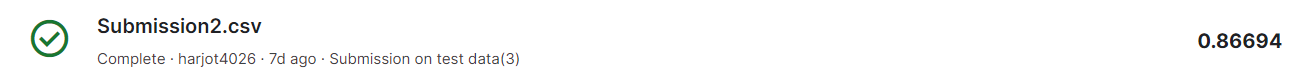

## Reduced iterations in the same model as above

In [ ]:
# from catboost import CatBoostRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # Specify the independent variables (X) and dependent variable (y)
# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors','SumClimate','HumanFactors_Sum','water_factors_Sum','land_factors_Sum','all_feature_Sum']]  # Add more independent variables as needed
# y = data['FloodProbability']

# # Create and fit the CatBoost regression model
# catboost_model3 = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, use_best_model=True)
# catboost_model3.fit(X, y, eval_set=(X, y), verbose=100)

# # Make predictions on the training data
# y_pred = catboost_model3.predict(X)

# # Calculate R-squared
# r_squared = r2_score(y, y_pred)
# print("R-squared:", r_squared)

# # Calculate mean squared error (MSE)
# mse = mean_squared_error(y, y_pred)
# print("Mean Squared Error:", mse)

# # Calculate mean absolute error (MAE)
# mae = mean_absolute_error(y, y_pred)
# print("Mean Absolute Error:", mae)

# bestTest = 0.01854292123
# bestIteration = 999

# R-squared: 0.867939760912803
# Mean Squared Error: 0.0003438399720049182
# Mean Absolute Error: 0.014484497450869308


In [ ]:
# from catboost import CatBoostRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # Specify the independent variables (X) and dependent variable (y)
# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors','SumClimate','HumanFactors_Sum','water_factors_Sum','land_factors_Sum','all_feature_Sum']]  # Add more independent variables as needed
# y = data['FloodProbability']

# # Create and fit the CatBoost regression model
# catboost_model4 = CatBoostRegressor(iterations=10000, learning_rate=0.1, depth=6, use_best_model=True)
# catboost_model4.fit(X, y, eval_set=(X, y), verbose=500)

# # Make predictions on the training data
# y_pred = catboost_model4.predict(X)

# # Calculate R-squared
# r_squared = r2_score(y, y_pred)
# print("R-squared:", r_squared)

# # Calculate mean squared error (MSE)
# mse = mean_squared_error(y, y_pred)
# print("Mean Squared Error:", mse)

# # Calculate mean absolute error (MAE)
# mae = mean_absolute_error(y, y_pred)
# print("Mean Absolute Error:", mae)

# bestTest = 0.01780493786
# bestIteration = 9999

# R-squared: 0.8782422262758987
# Mean Squared Error: 0.0003170158542650628
# Mean Absolute Error: 0.013843191622691384

In [ ]:
# pred3= catboost_model3.predict(df_test)

In [ ]:
# pred_formatted = ["{:.10f}".format(value) for value in pred3]
# # # Assuming df_test has index values that you want to include in the CSV file
# # indexes = df_test.index.tolist()

# # Create a DataFrame with indexes and predicted values
# result_df = pd.DataFrame({'id': df_test['id'], 'FloodProbability': pred_formatted})

# # Save the DataFrame to a CSV file
# result_df.to_csv('Submission3.csv', index=False)

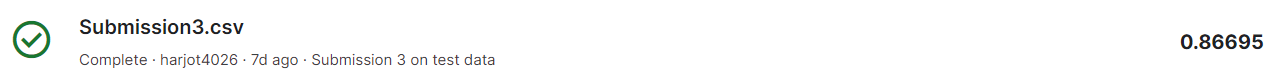

## Used SVR, trying to create best model.

Support vector regression

In [ ]:
# from sklearn.svm import SVR
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score

# # Specify the independent variables (X) and dependent variable (y)
# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors']]  # Add more independent variables as needed
# y = data['FloodProbability']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Create and fit the SVR model
# svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
# svr_model.fit(X_train_scaled, y_train)

# # Make predictions on the testing data
# y_pred = svr_model.predict(X_test_scaled)

# # Calculate performance metrics
# mse = mean_squared_error(y_test, y_pred)
# r_squared = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("R-squared:", r_squared)

# Mean Squared Error: 0.0009176546635070731
# R-squared: 0.6469575638588816


## Used Random forest

Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# # Specify the independent variables (X) and dependent variable (y)
# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors']]
# y = data['FloodProbability']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and fit the Random Forest model
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = rf_model.predict(X_test)

# # Calculate performance metrics
# mse = mean_squared_error(y_test, y_pred)
# r_squared = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("R-squared:", r_squared)

# Mean Squared Error: 0.0008964563006055674
# R-squared: 0.655113051951046


## Tried logistics as we have to predict probability, but failed.

Logistic

In [ ]:
# data['d_FloodProbability'] = (data['FloodProbability'] > 0.5).astype(int)

In [ ]:
#Failed

# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, roc_auc_score

# # Assuming X contains your features and y contains your binary target variable
# # Specify the independent variables (X) and dependent variable (y)
# X = data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors']]  # Add more independent variables as needed
# y = data['d_FloodProbability']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and fit the logistic regression model
# logistic_model = LogisticRegression()
# logistic_model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]  # Predict class probabilities for the positive class

# # Calculate accuracy (optional)
# y_pred = logistic_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Calculate ROC AUC score (area under the ROC curve)
# roc_auc = roc_auc_score(y_test, y_pred_proba)
# print("ROC AUC Score:", roc_auc)

In [ ]:
# y_train

In [ ]:
#Failed

# # Predict probabilities on the training data
# train_probabilities = logistic_model.predict_proba(X_train)
# train_probabilities

## Tried simple neural network

Neural networks

In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# class NeuralNetwork:
#     def __init__(self):
#         self.model = None

#     def build_model(self, input_shape):
#         model = Sequential([
#             Dense(64, activation='relu', input_shape=(input_shape,)),  # Corrected input_shape parameter
#             Dense(32, activation='relu'),
#             Dense(1)  # Output layer without activation for regression
#         ])
#         self.model = model

#     def train(self, X_train, y_train, epochs=100, batch_size=32, validation_split=0.2):
#         self.model.compile(optimizer='adam', loss='mse', metrics=['mae'])
#         history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

#     def predict(self, X):
#         return self.model.predict(X)

#     def r_squared(self, X, y):
#         y_pred = self.predict(X)
#         mean_y = np.mean(y)
#         ss_tot = np.sum((y - mean_y)**2)
#         ss_res = np.sum((y - y_pred.flatten())**2)
#         r2 = 1 - (ss_res / ss_tot)
#         return r2

# r-squared = 84.4......


In [ ]:
# # Instantiate the NeuralNetwork class
# model = NeuralNetwork()

# # Build the neural network model
# model.build_model(input_shape=X.shape[1])

# # Train the model
# model.train(X, y, epochs=50, batch_size=32, validation_split=0.2)

# # Predict probabilities for new data points
# # predicted_probabilities = model.predict(X_test)


In [ ]:
# # Calculate R-squared on the training data
# r2_train = model.r_squared(X, y)
# print("R-squared on training data:", r2_train)

In [ ]:
# df['MonsoonIntensity'].dtype

In [ ]:
# df['FloodProbability']

## 7th submission file prediction

In [ ]:
test_data = df_test.drop(columns=['id'])

In [ ]:
# Xtest = test_data[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#        'Siltation', 'AgriculturalPractices', 'Encroachments',
#        'IneffectiveDisasterPreparedness', 'DrainageSystems',
#        'CoastalVulnerability', 'Landslides', 'Watersheds',
#        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#        'InadequatePlanning', 'PoliticalFactors','SumClimate','HumanFactors_Sum','water_factors_Sum','land_factors_Sum','all_feature_Sum','InfrastructureQuality','WeightedSum']]

In [ ]:
# # Make predictions
# catboost_preds = catboost_model.predict(Xtest)
# xgb_preds = xgb_model.predict(Xtest)
# lgbm_preds = lgbm_model.predict(Xtest)

# # Combine predictions (simple averaging for regression)
# predictions1= (catboost_preds + xgb_preds + lgbm_preds) / 3

In [ ]:
# pred_formatted1 = ["{:.10f}".format(value) for value in predictions1]
# # # Assuming df_test has index values that you want to include in the CSV file
# # indexes = df_test.index.tolist()

# # Create a DataFrame with indexes and predicted values
# result_df = pd.DataFrame({'id': df_test['id'], 'FloodProbability': pred_formatted1})

# # Save the DataFrame to a CSV file
# result_df.to_csv('Submission7.csv', index=False)

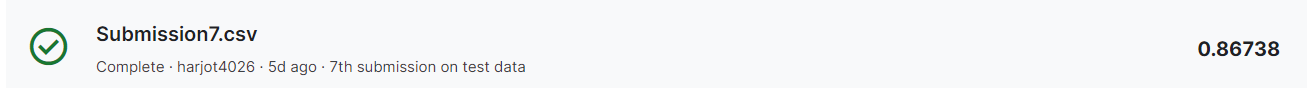

## Hyperparameter tuning of best model till now

In [ ]:
# from catboost import CatBoostRegressor    #(overfitted model)
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # Load and prepare data (X_train, X_test, y_train, y_test)
# X = data[['all_feature_Sum','MonsoonIntensity','InadequatePlanning',
#           'IneffectiveDisasterPreparedness','Siltation',
#           'DeterioratingInfrastructure','TopographyDrainage',
#           'Encroachments','DamsQuality','DrainageSystems','AgriculturalPractices',
#           'Deforestation','WetlandLoss',
#           'Landslides','RiverManagement','CoastalVulnerability','PoliticalFactors',
#           'ClimateChange','PopulationScore','Urbanization','Watersheds']]  # Add more independent variables as needed
# y = data['FloodProbability']

# # Train individual models
# catboost_model = CatBoostRegressor(iterations=5000, learning_rate=0.2, depth=7)
# xgb_model = XGBRegressor(n_estimators=5000, learning_rate=0.2, max_depth=7)
# lgbm_model = LGBMRegressor(n_estimators=5000, learning_rate=0.2, max_depth=7, num_leaves=128)

# catboost_model.fit(X, y)
# xgb_model.fit(X, y)
# lgbm_model.fit(X, y)

# # Make predictions
# catboost_preds = catboost_model.predict(X)
# xgb_preds = xgb_model.predict(X)
# lgbm_preds = lgbm_model.predict(X)

# # Combine predictions (simple averaging for regression)
# ensemble_preds = (catboost_preds + xgb_preds + lgbm_preds) / 3

# # Evaluate ensemble model
# ensemble_r2 = r2_score(y, ensemble_preds)
# ensemble_mse = mean_squared_error(y, ensemble_preds)
# ensemble_mae = mean_absolute_error(y, ensemble_preds)

# print("Ensemble Model R-squared:", ensemble_r2)
# print("Ensemble Model Mean Squared Error:", ensemble_mse)
# print("Ensemble Model Mean Absolute Error:", ensemble_mae)

# # Ensemble Model R-squared: 0.9127603784684802
# # Ensemble Model Mean Squared Error: 0.0002271423195388227
# # Ensemble Model Mean Absolute Error: 0.011475815730218728


In [ ]:
# Xtest = test_data[['all_feature_Sum','MonsoonIntensity','InadequatePlanning',
#           'IneffectiveDisasterPreparedness','Siltation',
#           'DeterioratingInfrastructure','TopographyDrainage',
#           'Encroachments','DamsQuality','DrainageSystems','AgriculturalPractices',
#           'Deforestation','WetlandLoss',
#           'Landslides','RiverManagement','CoastalVulnerability','PoliticalFactors',
#           'ClimateChange','PopulationScore','Urbanization','Watersheds']]

In [ ]:
# # Make predictions
# catboost_preds = catboost_model.predict(Xtest)
# xgb_preds = xgb_model.predict(Xtest)
# lgbm_preds = lgbm_model.predict(Xtest)

# # Combine predictions (simple averaging for regression)
# predictions1= (catboost_preds + xgb_preds + lgbm_preds) / 3

In [ ]:
# pred_formatted1 = ["{:.10f}".format(value) for value in predictions1]
# # # Assuming df_test has index values that you want to include in the CSV file
# # indexes = df_test.index.tolist()

# # Create a DataFrame with indexes and predicted values
# result_df = pd.DataFrame({'id': df_test['id'], 'FloodProbability': pred_formatted1})

# # Save the DataFrame to a CSV file
# result_df.to_csv('Submission19.csv', index=False)

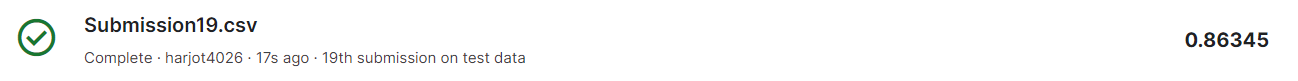